In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [38]:
df = pd.read_csv("Steel_industry_data.csv")
df_clean = df.copy()

In [39]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [40]:
df.shape

(35040, 11)

In [41]:
df.describe()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                                2.090000      0.020000   
max                               27.760000      0.070000   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
count                  35040.000000                  35040.000000   
mean                      80.578056                     84.367870   
std                       18.921322                     30.456535   
min                        0.000000                      0.000000   
25%                       63.320000                     99.700000   
50%                       87.960000                    100.000000   
75%                       99.022500                    100.000000   
max                      100.000000                    100.000000   

                NSM  
count  35040.000000  
mean   42750.000000  
std    24940.534317  
min        0.000000  
25%    21375.000000  
50%    42750.000000  
75%    64125.000000  
max    85500.000000

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [43]:
df.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [44]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(35040, 11)
(35040, 11)


### Dataset bu ana kadar gördüğümüz üzere null değer içermeyen , aynı satır bulunmayan bir dataset. df.describe tablosunu da incelediğimiz zaman herhangi bir anomali görünmemekte. Bu yüzeysel incelemeden sonra her bir kolonu ayrı ayrı incelemeye geçelim.

In [45]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [46]:
categoric_cols = [col for col in df.columns if df[col].dtype == "O"]

numeric_cols = [col for col in df.columns if df[col].dtype != "O"]

print(categoric_cols)
print(numeric_cols)

['date', 'WeekStatus', 'Day_of_week', 'Load_Type']
['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


In [47]:
#Her bir numeric kolonu analiz etmek için bir fonksiyon yazdık. Sonrasında for döngüsü içersinde bu fonksiyonu kullanarak her bir kolonu detaylı bir şekilde inceleyebilir ve hakkında yorum yapabiliriz.



def analyze_column(df, column_name):
    
    
    print("="*80)
    print(f" KOLON ANALİZİ: {column_name}")
    print("="*80)
    
    print("\n1️ İSTATİSTİKSEL ÖZET:")
    print("-"*50)
    data = df[column_name]
    
    print(f"Veri Sayısı:     {len(data):,}")
    print(f"Minimum:         {data.min():.2f}")
    print(f"Maksimum:        {data.max():.2f}")
    print(f"Ortalama:        {data.mean():.2f}")
    print(f"Medyan:          {data.median():.2f}")
    print(f"Std Sapma:       {data.std():.2f}")
    print(f"Varyans:         {data.var():.2f}")
    print(f"Skewness:        {data.skew():.2f}")
    print(f"Kurtosis:        {data.kurtosis():.2f}")
    
   
    print(f"\nYüzdelik Dilimler:")
    print(f"  25%:  {data.quantile(0.25):.2f}")
    print(f"  50%:  {data.quantile(0.50):.2f}")
    print(f"  75%:  {data.quantile(0.75):.2f}")
    print(f"  95%:  {data.quantile(0.95):.2f}")
    print(f"  99%:  {data.quantile(0.99):.2f}")
    
    
    print("\n2️ DAĞILIM ANALİZİ:")
    print("-"*50)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    axes[0, 0].hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', 
                       label=f'Mean: {data.mean():.2f}')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', 
                       label=f'Median: {data.median():.2f}')
    axes[0, 0].set_title(f'{column_name} - Histogram')
    axes[0, 0].set_xlabel(column_name)
    axes[0, 0].set_ylabel('Frekans')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box Plot
    axes[0, 1].boxplot(data, vert=True)
    axes[0, 1].set_title(f'{column_name} - Box Plot')
    axes[0, 1].set_ylabel(column_name)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Density Plot
    data.plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
    axes[1, 0].set_title(f'{column_name} - Density Plot')
    axes[1, 0].set_xlabel(column_name)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'{column_name} - Q-Q Plot')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

 KOLON ANALİZİ: Usage_kWh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        157.18
Ortalama:        27.39
Medyan:          4.57
Std Sapma:       33.44
Varyans:         1118.53
Skewness:        1.20
Kurtosis:        0.39

Yüzdelik Dilimler:
  25%:  3.20
  50%:  4.57
  75%:  51.24
  95%:  99.04
  99%:  122.71

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


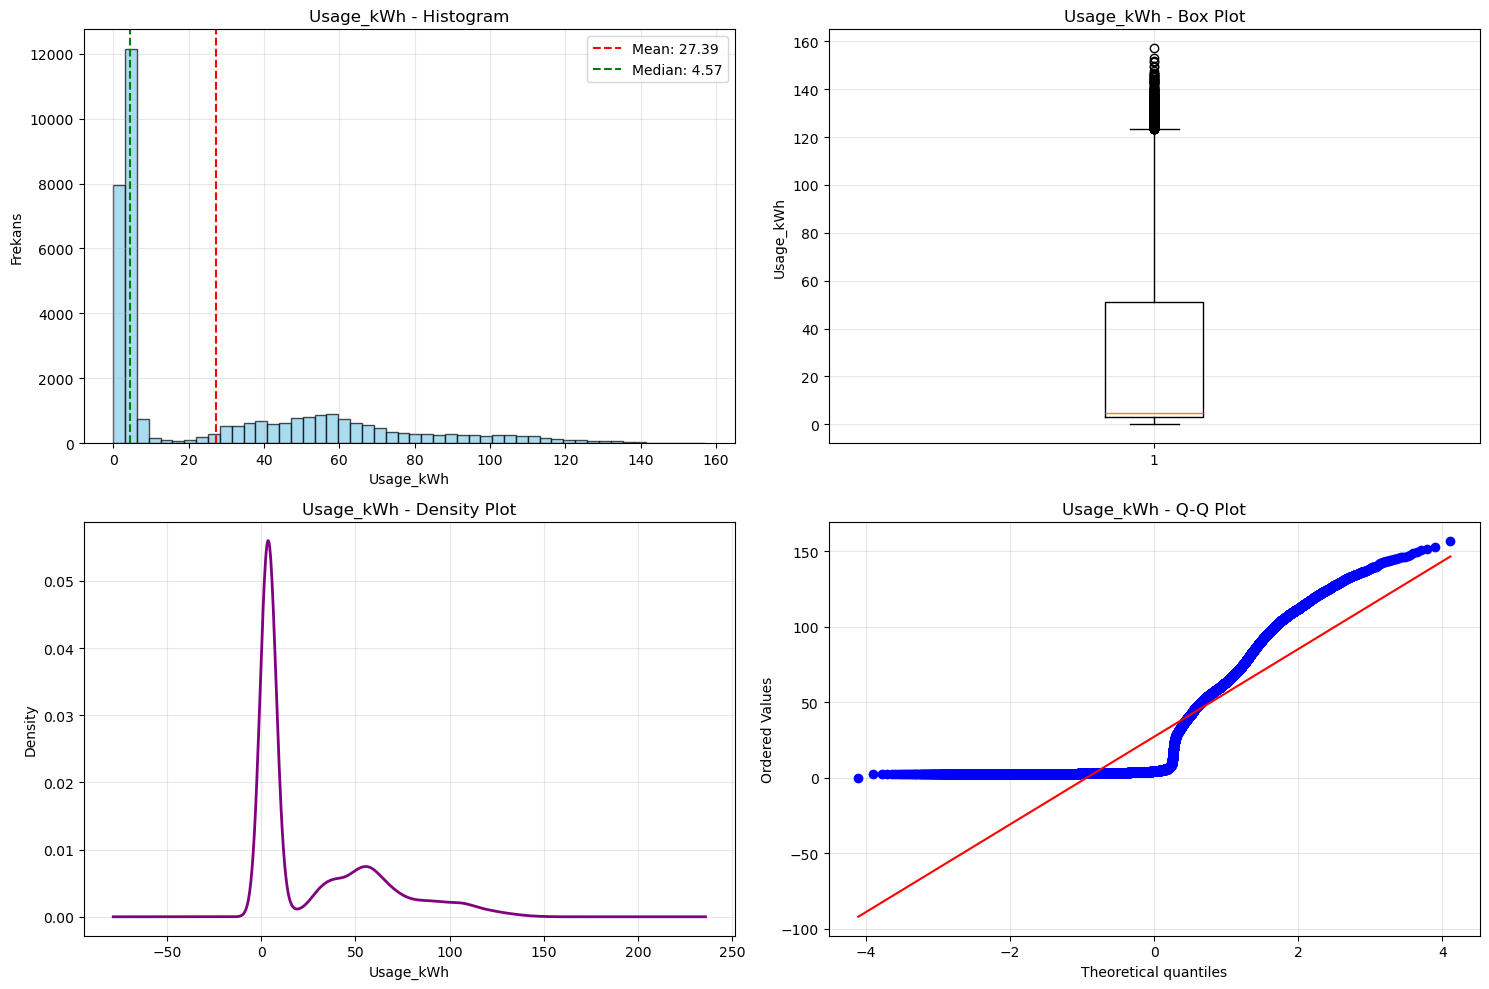

 KOLON ANALİZİ: Lagging_Current_Reactive.Power_kVarh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        96.91
Ortalama:        13.04
Medyan:          5.00
Std Sapma:       16.31
Varyans:         265.89
Skewness:        1.44
Kurtosis:        1.21

Yüzdelik Dilimler:
  25%:  2.30
  50%:  5.00
  75%:  22.64
  95%:  47.74
  99%:  62.90

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


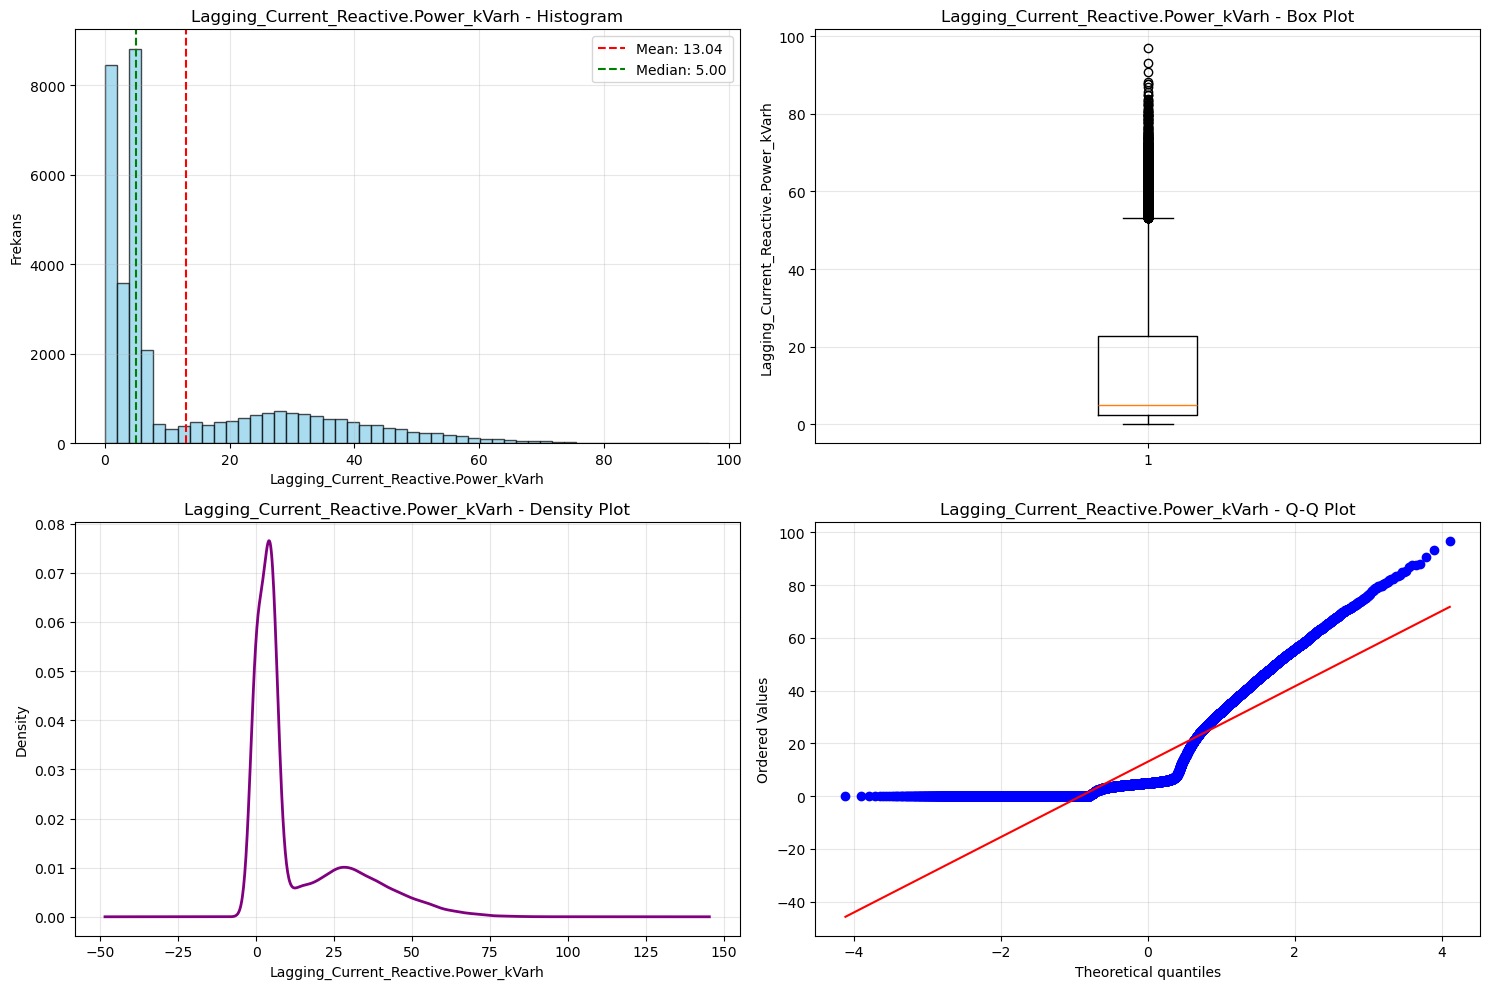

 KOLON ANALİZİ: Leading_Current_Reactive_Power_kVarh

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        27.76
Ortalama:        3.87
Medyan:          0.00
Std Sapma:       7.42
Varyans:         55.12
Skewness:        1.73
Kurtosis:        1.58

Yüzdelik Dilimler:
  25%:  0.00
  50%:  0.00
  75%:  2.09
  95%:  21.28
  99%:  26.39

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


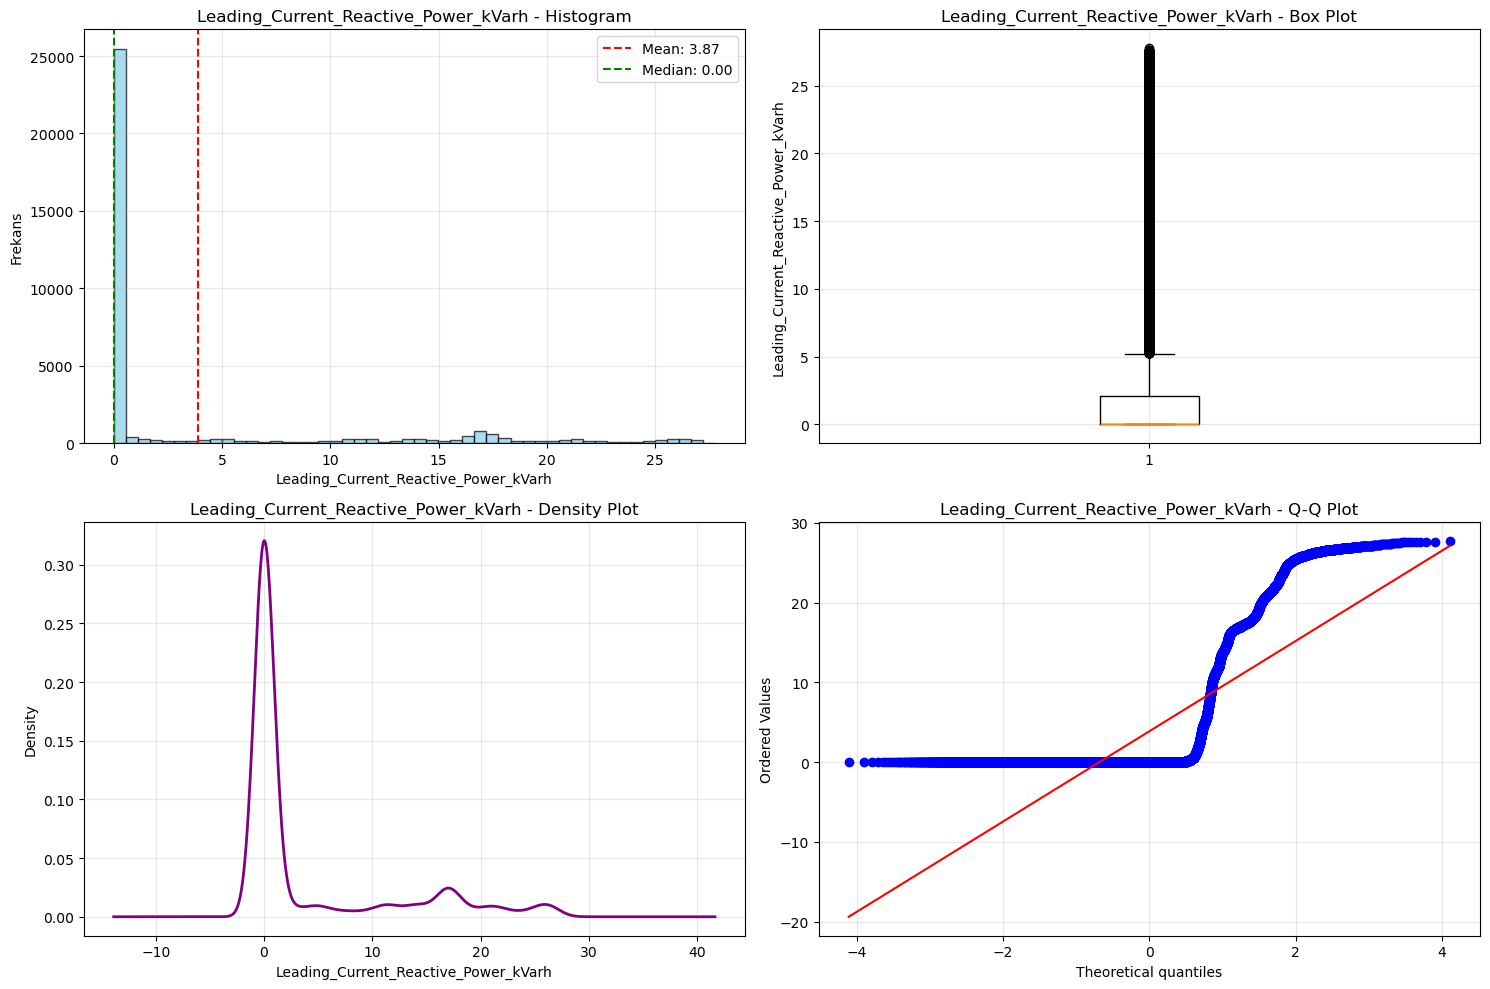

 KOLON ANALİZİ: CO2(tCO2)

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        0.07
Ortalama:        0.01
Medyan:          0.00
Std Sapma:       0.02
Varyans:         0.00
Skewness:        1.15
Kurtosis:        0.21

Yüzdelik Dilimler:
  25%:  0.00
  50%:  0.00
  75%:  0.02
  95%:  0.05
  99%:  0.06

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


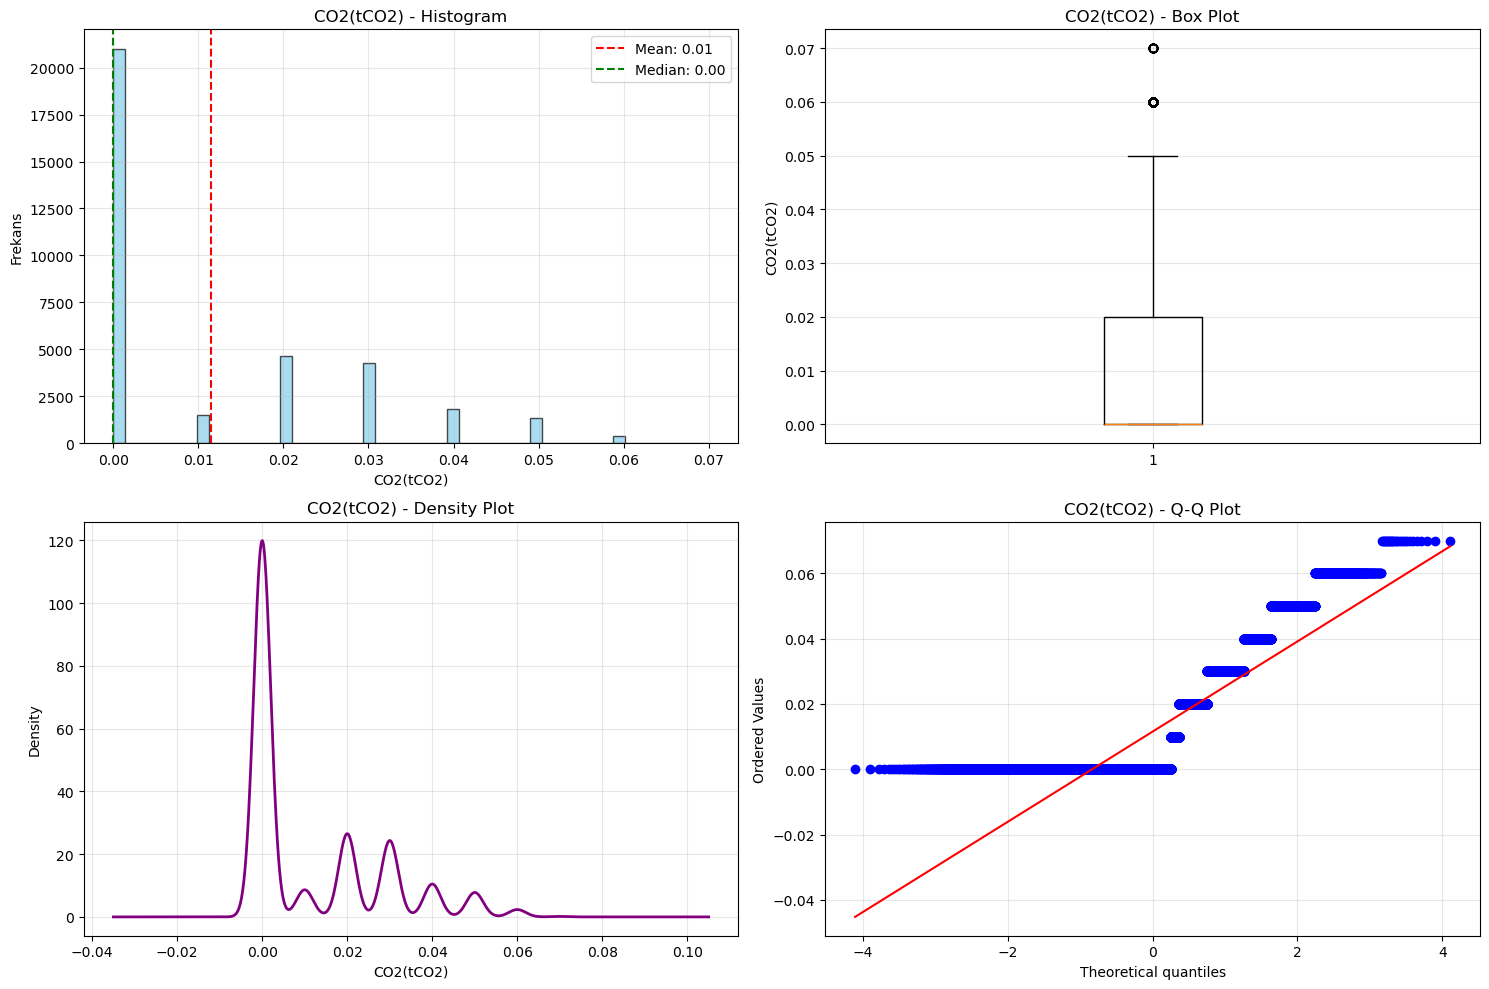

 KOLON ANALİZİ: Lagging_Current_Power_Factor

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        100.00
Ortalama:        80.58
Medyan:          87.96
Std Sapma:       18.92
Varyans:         358.02
Skewness:        -0.61
Kurtosis:        -1.10

Yüzdelik Dilimler:
  25%:  63.32
  50%:  87.96
  75%:  99.02
  95%:  100.00
  99%:  100.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


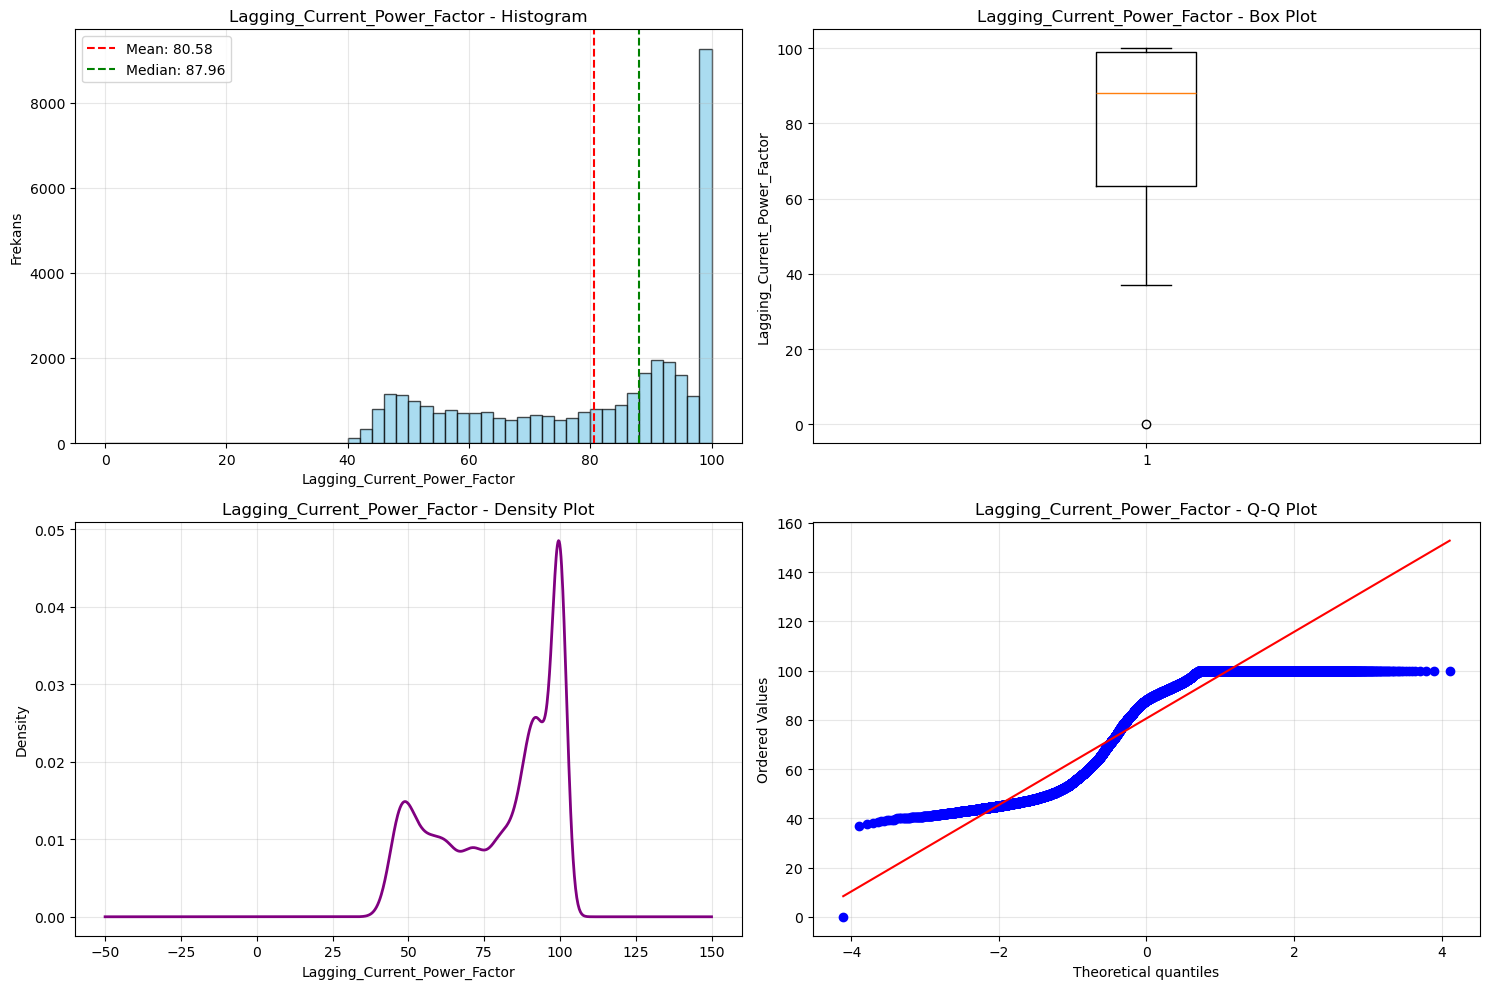

 KOLON ANALİZİ: Leading_Current_Power_Factor

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        100.00
Ortalama:        84.37
Medyan:          100.00
Std Sapma:       30.46
Varyans:         927.60
Skewness:        -1.51
Kurtosis:        0.38

Yüzdelik Dilimler:
  25%:  99.70
  50%:  100.00
  75%:  100.00
  95%:  100.00
  99%:  100.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


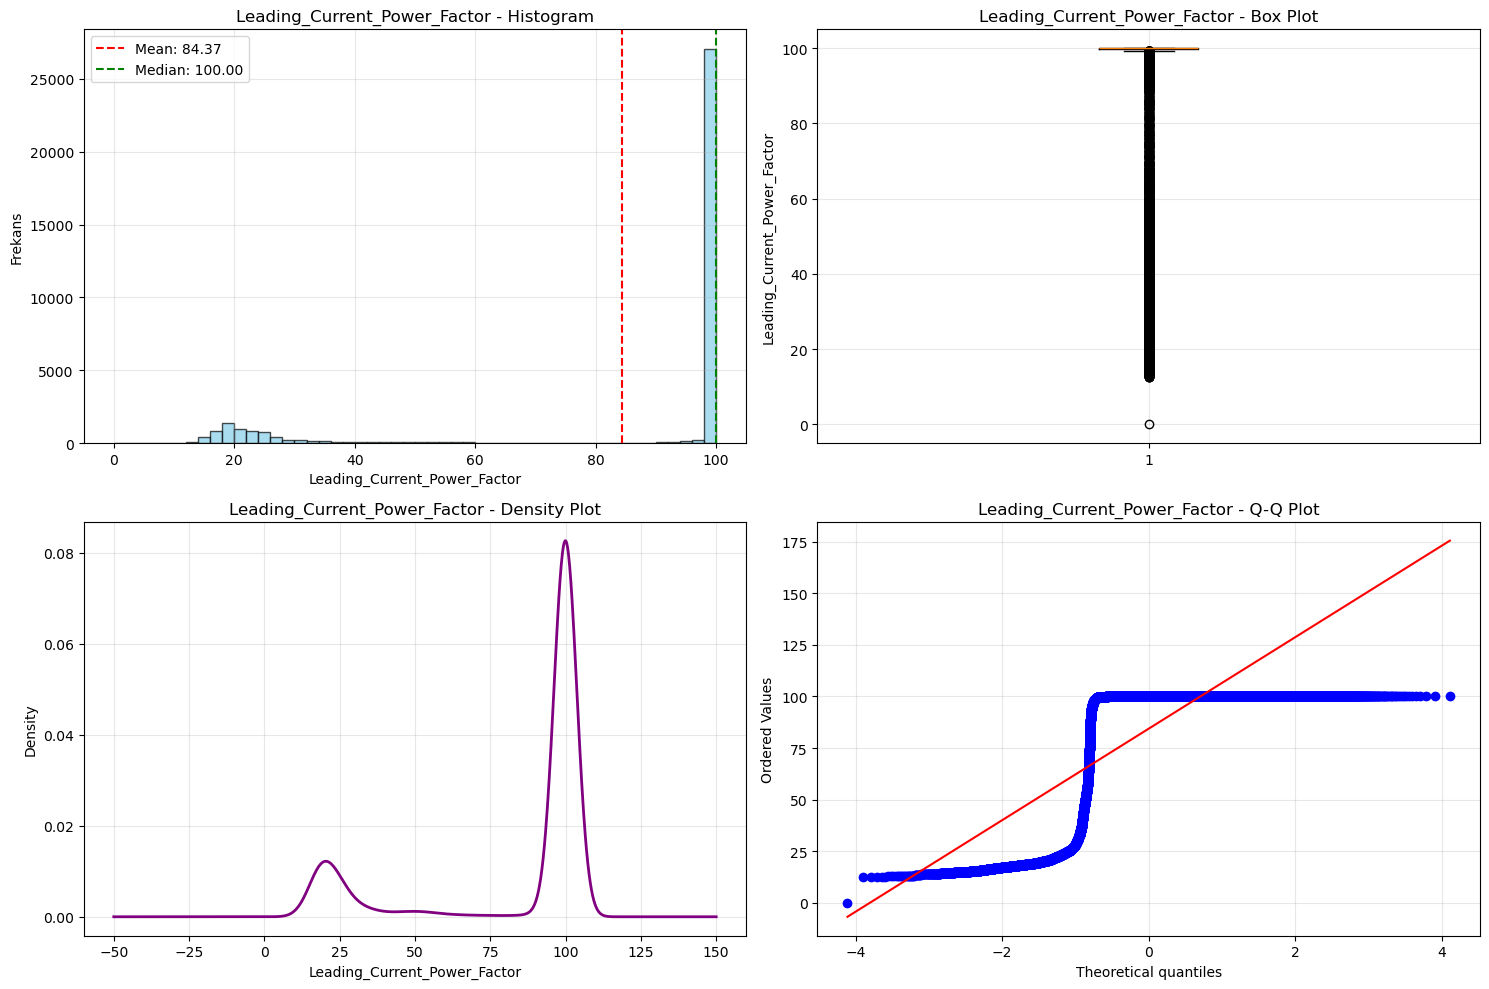

 KOLON ANALİZİ: NSM

1️ İSTATİSTİKSEL ÖZET:
--------------------------------------------------
Veri Sayısı:     35,040
Minimum:         0.00
Maksimum:        85500.00
Ortalama:        42750.00
Medyan:          42750.00
Std Sapma:       24940.53
Varyans:         622030252.00
Skewness:        0.00
Kurtosis:        -1.20

Yüzdelik Dilimler:
  25%:  21375.00
  50%:  42750.00
  75%:  64125.00
  95%:  81900.00
  99%:  85500.00

2️ DAĞILIM ANALİZİ:
--------------------------------------------------


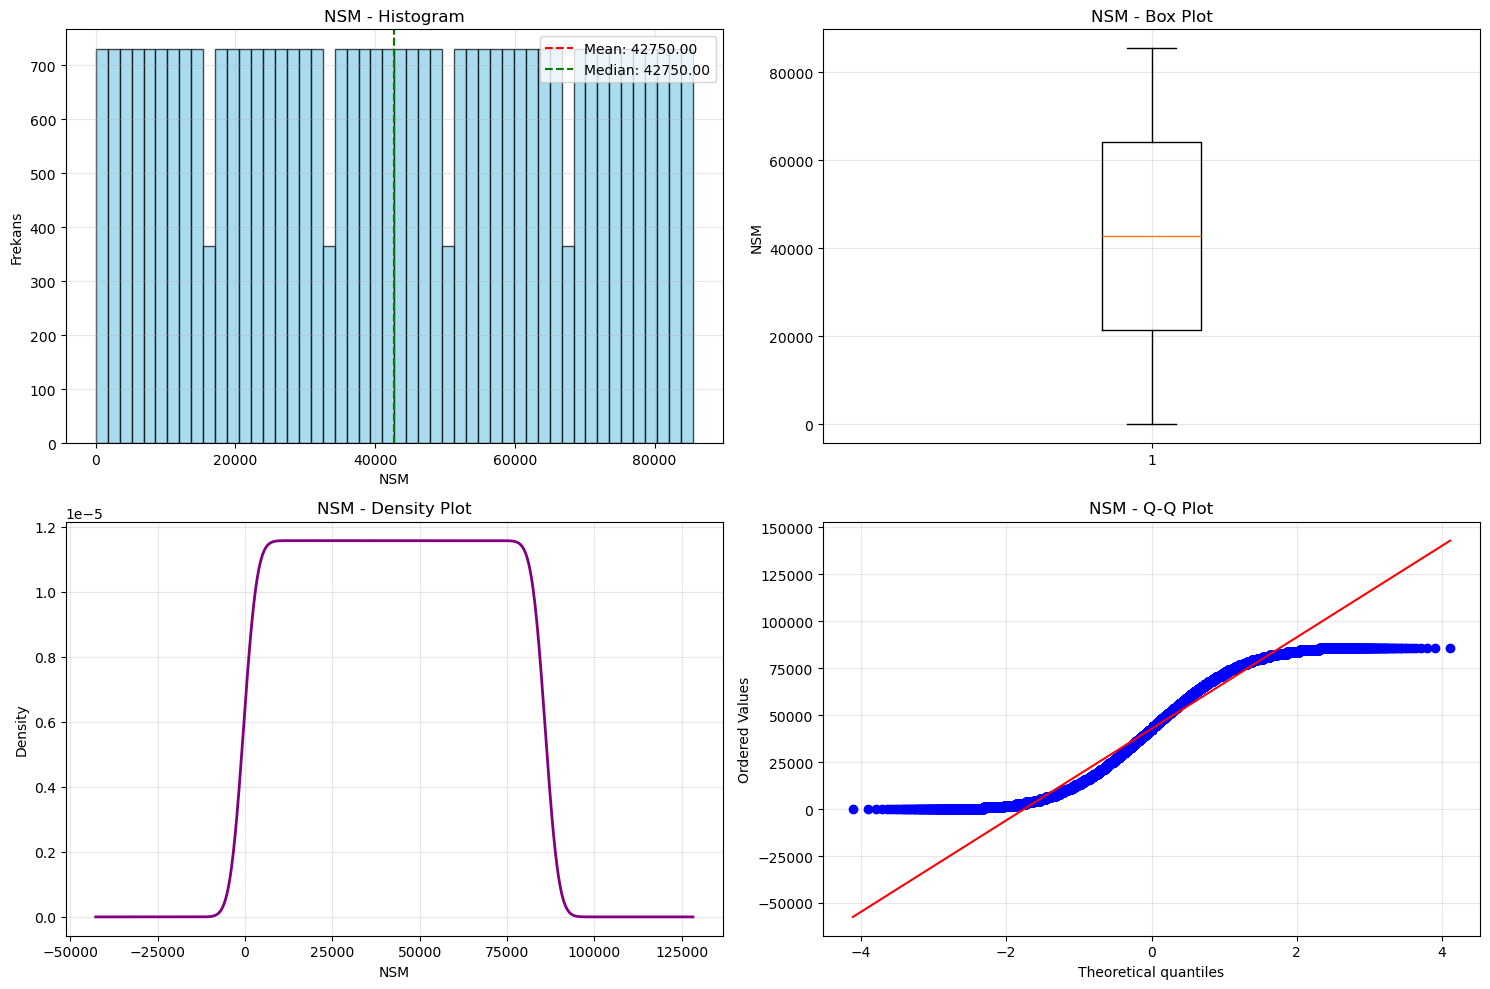

In [48]:
for col in numeric_cols:
    analyze_column(df,col)

### Usage_kWh
 Bimodal dağılım gösteriyor. Verilerin çoğu 0-10 kWh arasında, ikinci bir yoğunluk 20-60 kWh civarında. Muhtemelen farklı çalışma modları var - düşük tüketim bekleme/duruş, yüksek tüketim aktif üretim. Ortalama (27.39) ile medyan (4.57) arasındaki fark sağa çarpıklığı gösteriyor. Box plot'ta çok sayıda outlier var.
### Lagging_Current_Reactive_Power_kVarh
Usage_kWh'a benzer bimodal yapı. Reaktif güç enerji tüketimiyle paralel artıyor. Medyan (5.00) ortalamanın (13.04) altında. Üst kısımda yoğun outlier'lar var.
### Leading_Current_Reactive_Power_kVarh
Medyan 0, verilerin çoğu sıfıra yakın. Histogram'da keskin tepe, sonra uzun kuyruk. Endüstriyel yüklerde beklenen bir durum - genelde lagging karakterli motorlar/transformatörler olduğu için leading reactive power düşük.
### CO2(tCO2)
Discrete değerler alıyor. Çoğu veri 0'da, sonra belirli seviyelerde (0.02, 0.03, 0.04) tepe noktaları. Muhtemelen farklı modlar için sabit katsayılarla hesaplanmış.
### Lagging_Current_Power_Factor
Bimodal dağılım: bir grup 100 civarında (verimli), diğer grup 40-80 arasında geniş dağılım. Yüksek değerler verimli çalışmayı, düşük değerler reaktif gücün yüksek olduğu verimsiz dönemleri gösteriyor.
### Leading_Current_Power_Factor
Verilerin neredeyse tamamı 100 değerinde. Leading power factor çoğunlukla kullanılmıyor/inaktif. Endüstriyel tesislerde kapasitif yükler nadir olduğu için normal.
### NSM
Mükemmel uniform dağılım. Değer aralığı 0-86400 (bir günün saniye sayısı). Veri toplama günün her saatine eşit dağılmış. Bu dataset zaman serisi özellikleri taşıyor.

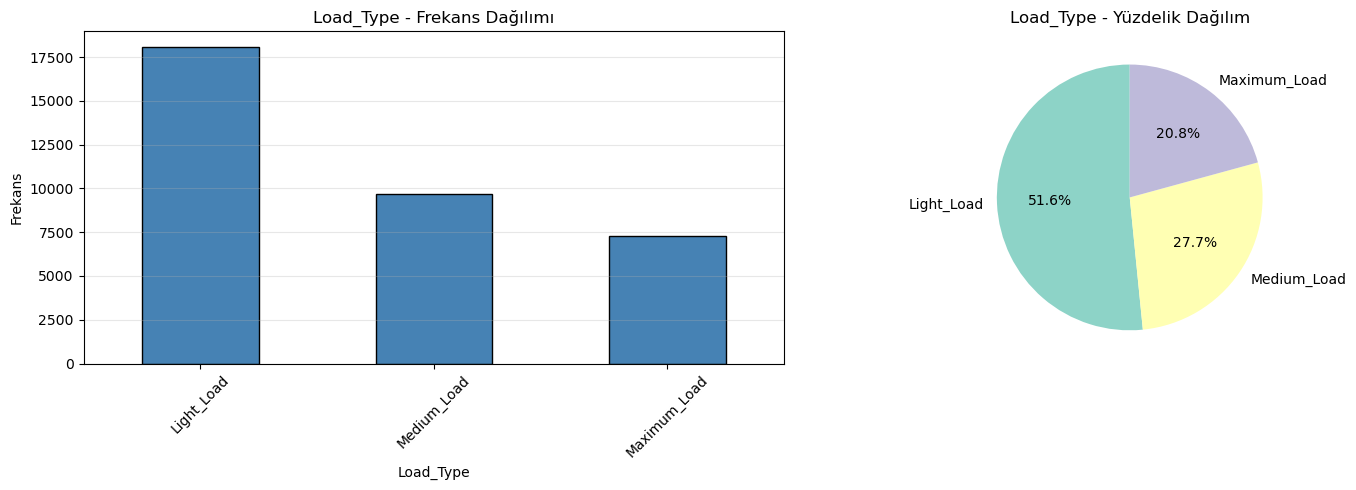

In [49]:
# Numeric kolon analizimiz bitti kategorik kolonlarda analiz edilmesi gereken tek kolon load type o yüzden fonksiyon yazmıyoruz.

value_counts = df['Load_Type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

value_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Load_Type - Frekans Dağılımı')
axes[0].set_xlabel('Load_Type')
axes[0].set_ylabel('Frekans')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

colors = plt.cm.Set3(range(len(value_counts)))
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Load_Type - Yüzdelik Dağılım')

plt.tight_layout()
plt.show()


 KOLONLAR ARASI İLİŞKİ ANALİZİ

Korelasyon Matrisi:
                                      Usage_kWh  \
Usage_kWh                                  1.00   
Lagging_Current_Reactive.Power_kVarh       0.90   
Leading_Current_Reactive_Power_kVarh      -0.32   
CO2(tCO2)                                  0.99   
Lagging_Current_Power_Factor               0.39   
Leading_Current_Power_Factor               0.35   
NSM                                        0.23   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                             0.90   
Lagging_Current_Reactive.Power_kVarh                                  1.00   
Leading_Current_Reactive_Power_kVarh                                 -0.41   
CO2(tCO2)                                                             0.89   
Lagging_Current_Power_Factor                                          0.14   
Leading_Current_Power_Factor                                          0

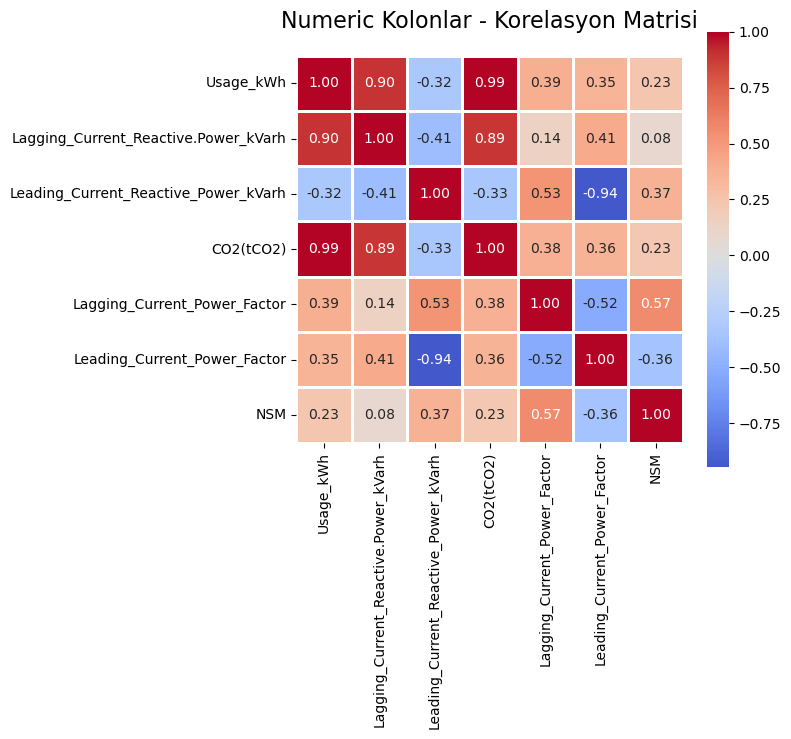


 Usage_kWh İLE DİĞER KOLONLAR ARASINDAKİ İLİŞKİLER

Usage_kWh ile Korelasyonlar (Sıralı):
  CO2(tCO2)                                         :   0.988
  Lagging_Current_Reactive.Power_kVarh              :   0.896
  Lagging_Current_Power_Factor                      :   0.386
  Leading_Current_Power_Factor                      :   0.354
  NSM                                               :   0.235
  Leading_Current_Reactive_Power_kVarh              :  -0.325


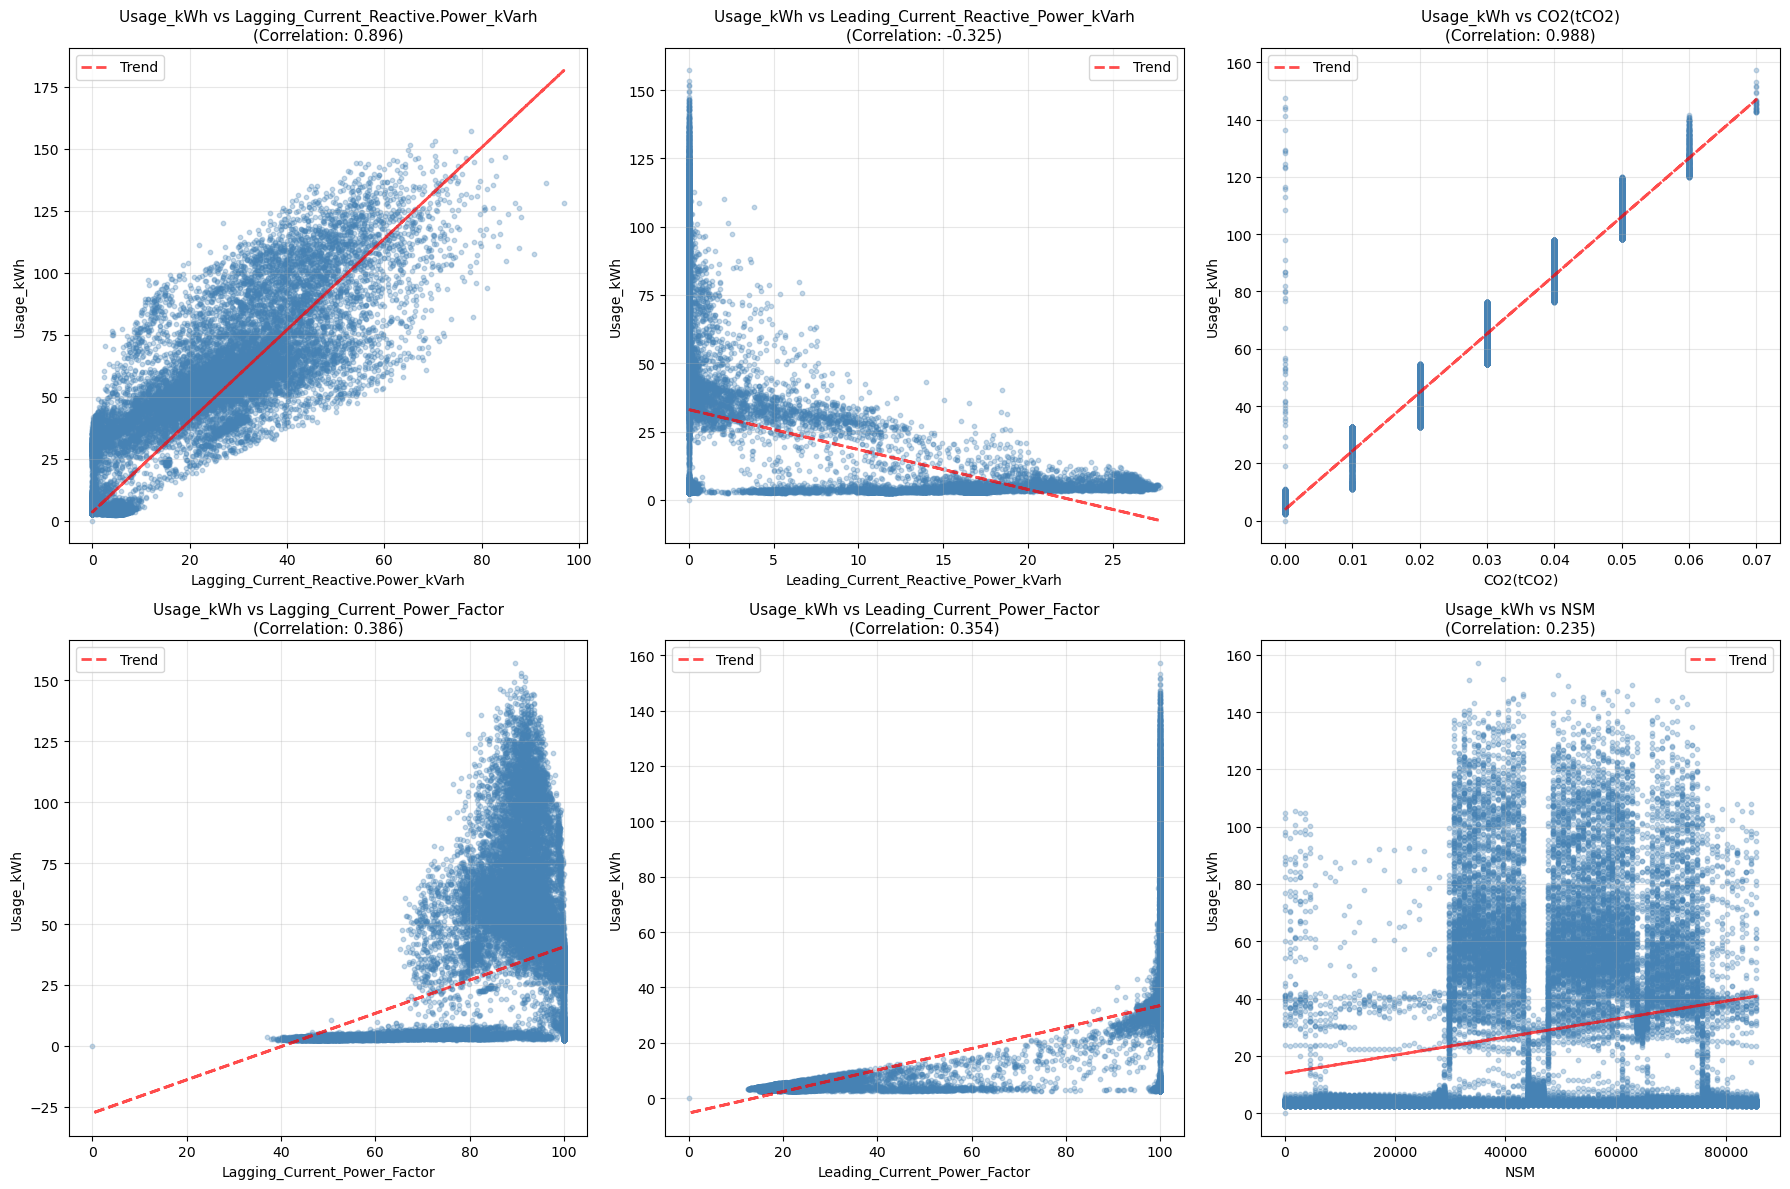


 REACTIVE POWER BALANCE ANALİZİ

Reactive Power Difference İstatistikleri:
  Ortalama: 9.16 kVarh
  Medyan:   4.97 kVarh
  Std Dev:  20.47 kVarh

Reactive Power Ratio İstatistikleri:
  Ortalama: 3482.368
  Medyan:   0.000


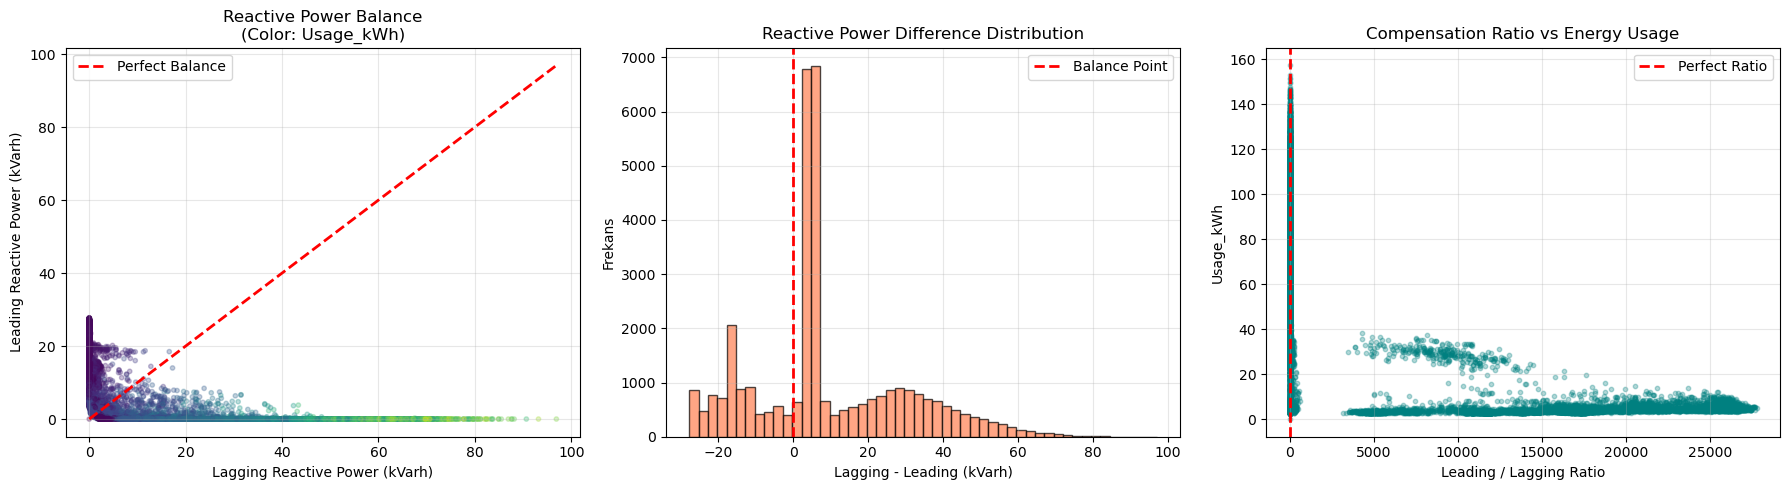


 POWER FACTOR VERİMLİLİK ANALİZİ

Power Factor Kategorilerine Göre Usage_kWh İstatistikleri:
                 count       mean  median        std
PF_Category                                         
İyi (85-94)       8062  69.731867   63.50  28.452405
Orta (70-84)      5183  26.571534    5.83  28.576190
Mükemmel (>=95)  11067  19.973216    4.90  25.409517
Düşük (<70)      10728   3.606875    3.10   3.811255


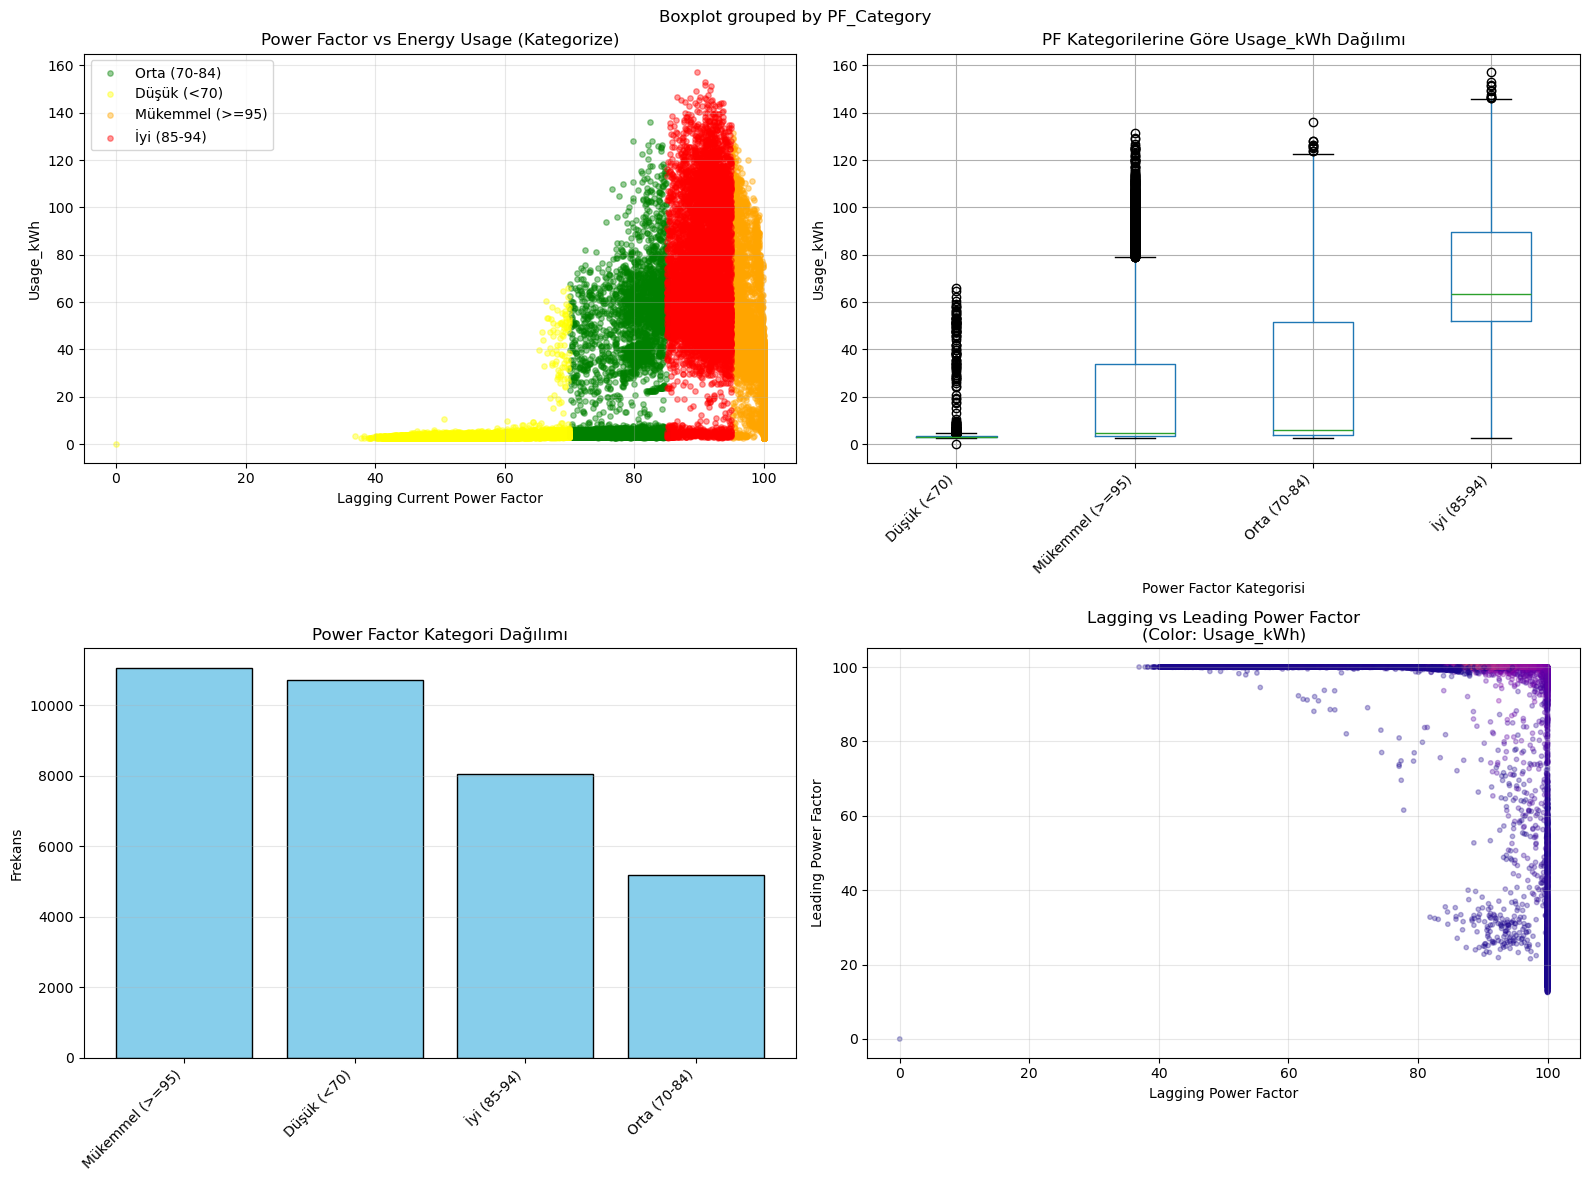


 LOAD TYPE BAZINDA KARŞILAŞTIRMALI ANALİZ

Load Type Bazında İstatistikler:
             Usage_kWh               Lagging_Current_Reactive.Power_kVarh  \
                  mean median    std                                 mean   
Load_Type                                                                   
Light_Load        8.63   3.31  17.91                                 7.00   
Maximum_Load     59.27  56.63  29.75                                26.19   
Medium_Load      38.45  34.44  35.22                                14.41   

                           Leading_Current_Reactive_Power_kVarh               \
             median    std                                 mean median   std   
Load_Type                                                                      
Light_Load     4.46  11.68                                 2.94   0.00  6.40   
Maximum_Load  26.46  17.28                                 1.62   0.00  4.75   
Medium_Load    5.65  16.82                                 7

C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\3589948363.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\3589948363.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\3589948363.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\35899

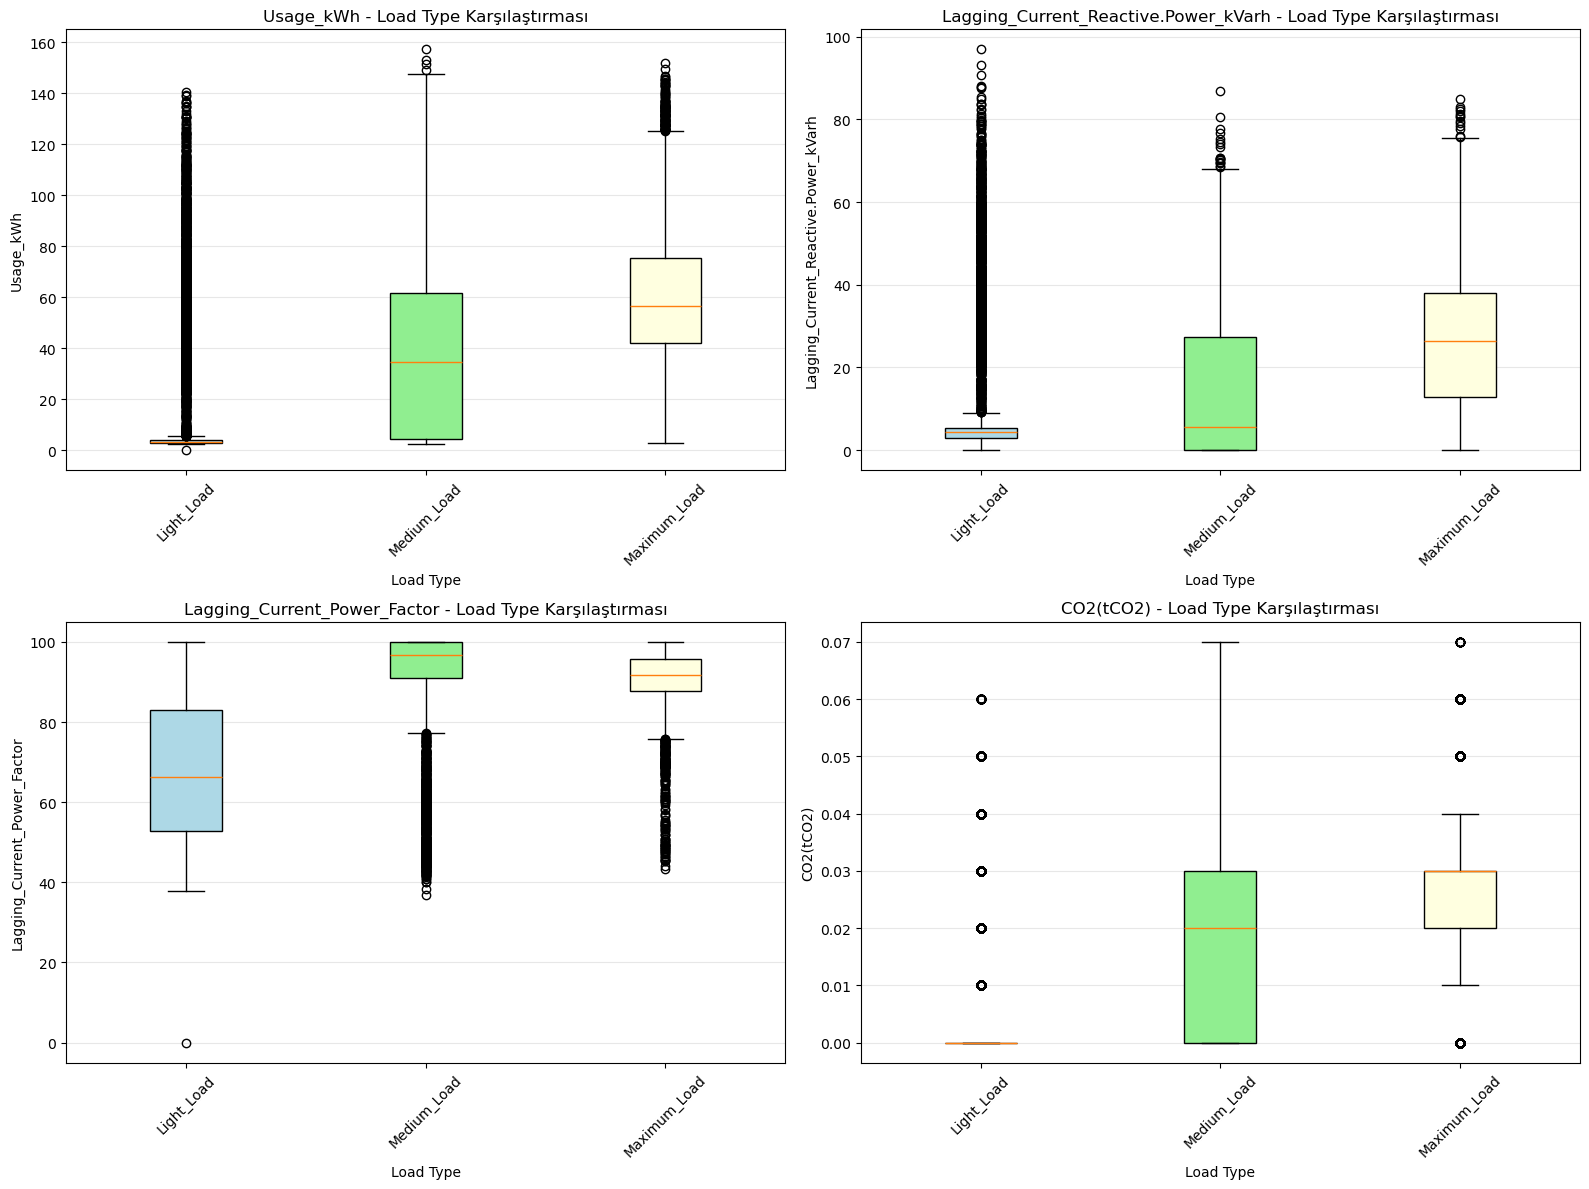

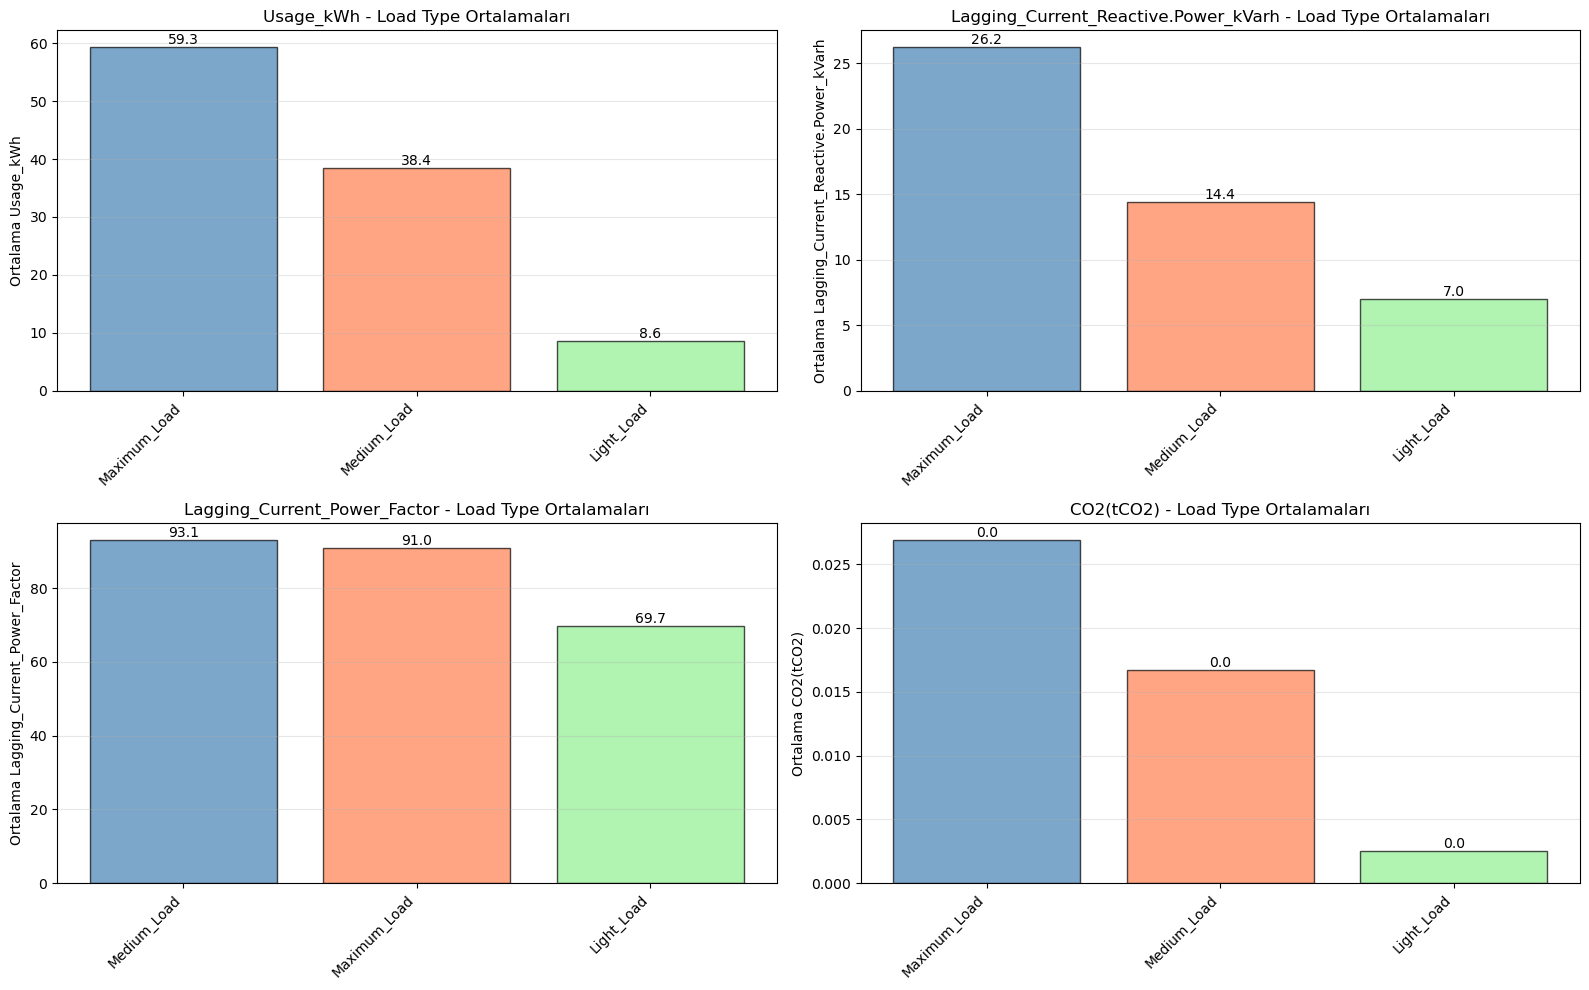


 ZAMAN BAZLI PATTERN ANALİZİ (NSM)

Saatlik Usage_kWh İstatistikleri:
       mean  median    std  count
Hour                             
0      7.87    3.48  16.06   1460
1      6.07    3.35  12.01   1460
2      4.43    3.20   6.58   1460
3      4.36    3.13   6.38   1460
4      4.31    3.13   6.43   1460
5      4.25    3.13   6.49   1460
6      4.22    3.10   6.76   1460
7      4.50    3.31   6.49   1460
8     37.70   34.70  33.31   1460
9     58.55   59.44  34.89   1460
10    55.87   55.73  33.59   1460
11    57.10   58.10  34.22   1460
12    18.46    6.19  26.43   1460
13    39.02   37.22  34.00   1460
14    56.16   56.52  33.79   1460
15    55.64   55.58  33.79   1460
16    55.80   56.63  34.34   1460
17    43.83   42.86  34.33   1460
18    33.02   31.25  29.36   1460
19    38.21   39.62  34.47   1460
20    37.48   37.33  34.49   1460
21    13.78    4.36  20.79   1460
22     8.66    3.74  16.50   1460
23     8.00    3.56  16.08   1460


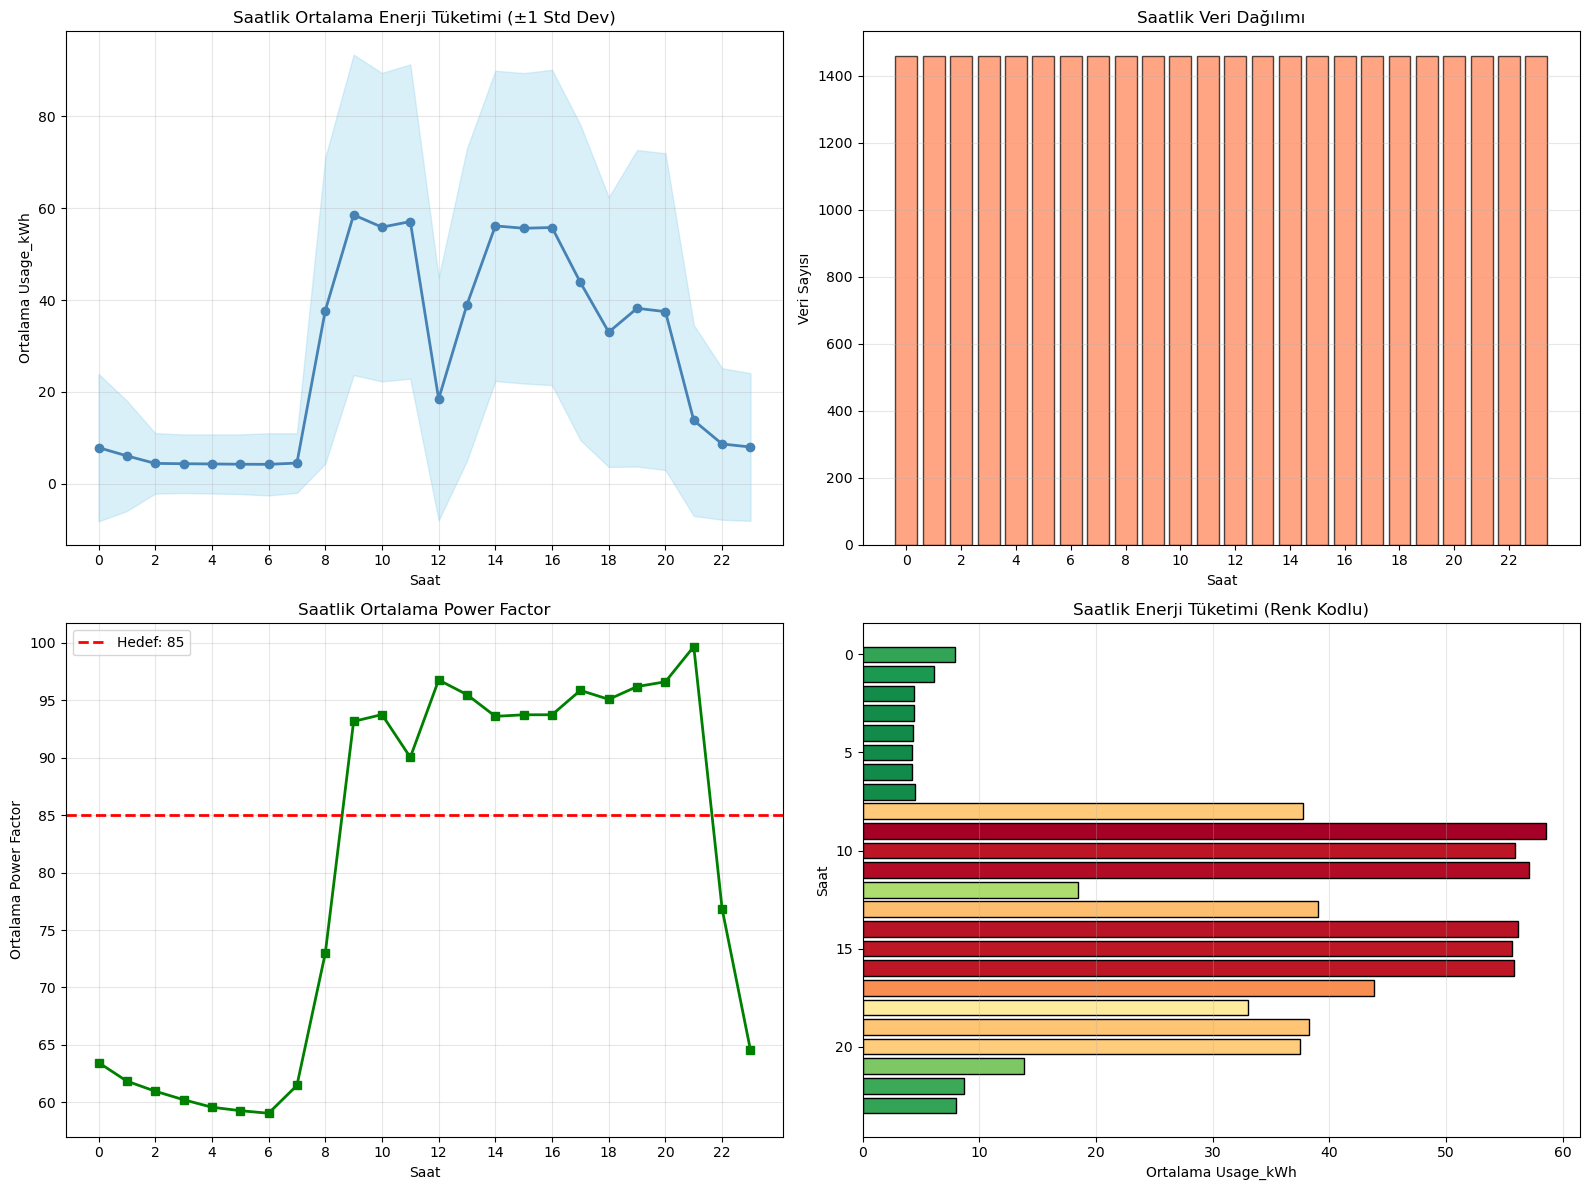


En Yüksek Tüketim Saatleri:
           mean  median
Hour                   
9     58.551733   59.44
11    57.097459   58.10
14    56.155260   56.52
10    55.874733   55.73
16    55.799582   56.63

En Düşük Tüketim Saatleri:
          mean  median
Hour                  
6     4.223705    3.10
5     4.245548    3.13
4     4.309438    3.13
3     4.358041    3.13
2     4.428390    3.20

 CO2 EMİSYONU ANALİZİ

CO2 Emission Factor İstatistikleri:
  Ortalama: 0.000185 tCO2/kWh
  Medyan:   0.000000 tCO2/kWh
  Min:      0.000000 tCO2/kWh
  Max:      0.000917 tCO2/kWh


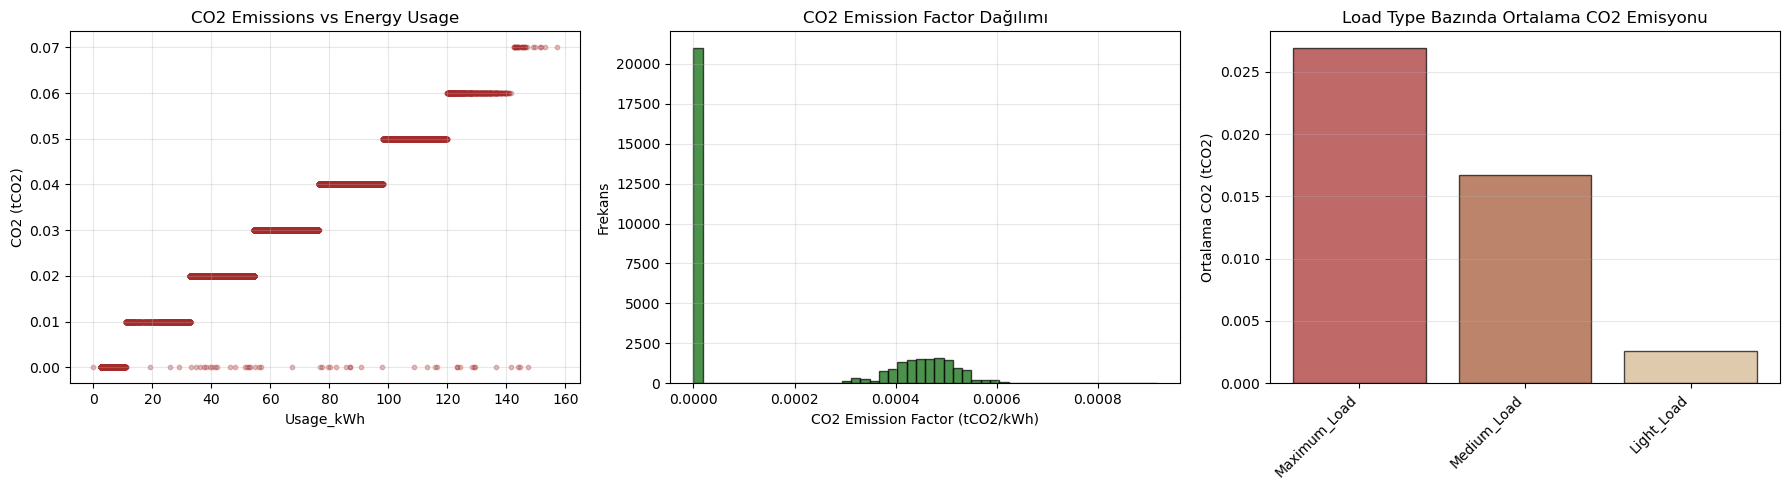


 KOLON İLİŞKİ ANALİZİ TAMAMLANDI


In [50]:
# Kolonlar arası ilişkileri incelemek için correlation matrix ve scatter plotlar oluşturacağız.
# Öncelikle tüm numeric kolonlar arası korelasyonu inceleyelim.

print("="*80)
print(" KOLONLAR ARASI İLİŞKİ ANALİZİ")
print("="*80)

correlation_matrix = df[numeric_cols].corr()

print("\nKorelasyon Matrisi:")
print(correlation_matrix.round(2))

print("\nYüksek Korelasyonlu Değişken Çiftleri (|r| > 0.7):")
print("-"*50)

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_value:.3f}")

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Numeric Kolonlar - Korelasyon Matrisi", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Şimdi Usage_kWh ile diğer kolonlar arasındaki ilişkileri inceleyen tablolar oluştuurcaz
print("\n" + "="*80)
print(" Usage_kWh İLE DİĞER KOLONLAR ARASINDAKİ İLİŞKİLER")
print("="*80)

target_correlations = correlation_matrix["Usage_kWh"].drop("Usage_kWh").sort_values(ascending=False)
print("\nUsage_kWh ile Korelasyonlar (Sıralı):")
for col, corr in target_correlations.items():
    print(f"  {col:50s}: {corr:7.3f}")

# Usage_kWh vs diğer önemli değişkenler - Scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

scatter_cols = ["Lagging_Current_Reactive.Power_kVarh", 
                "Leading_Current_Reactive_Power_kVarh",
                "CO2(tCO2)",
                "Lagging_Current_Power_Factor",
                "Leading_Current_Power_Factor",
                "NSM"]

for idx, col in enumerate(scatter_cols):
    axes[idx].scatter(df[col], df["Usage_kWh"], alpha=0.3, s=10, color="steelblue")
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel("Usage_kWh", fontsize=10)
    axes[idx].set_title(f"Usage_kWh vs {col}\n(Correlation: {correlation_matrix.loc['Usage_kWh', col]:.3f})", 
                       fontsize=11)
    axes[idx].grid(True, alpha=0.3)
    
    z = np.polyfit(df[col], df["Usage_kWh"], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", linewidth=2, alpha=0.7, label="Trend")
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" REACTIVE POWER BALANCE ANALİZİ")
print("="*80)

df["Reactive_Power_Difference"] = df["Lagging_Current_Reactive.Power_kVarh"] - df["Leading_Current_Reactive_Power_kVarh"]
df["Reactive_Power_Ratio"] = df["Leading_Current_Reactive_Power_kVarh"] / (df["Lagging_Current_Reactive.Power_kVarh"] + 0.001)

print("\nReactive Power Difference İstatistikleri:")
print(f"  Ortalama: {df['Reactive_Power_Difference'].mean():.2f} kVarh")
print(f"  Medyan:   {df['Reactive_Power_Difference'].median():.2f} kVarh")
print(f"  Std Dev:  {df['Reactive_Power_Difference'].std():.2f} kVarh")

print("\nReactive Power Ratio İstatistikleri:")
print(f"  Ortalama: {df['Reactive_Power_Ratio'].mean():.3f}")
print(f"  Medyan:   {df['Reactive_Power_Ratio'].median():.3f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Lagging vs Leading scatter
axes[0].scatter(df["Lagging_Current_Reactive.Power_kVarh"], 
               df["Leading_Current_Reactive_Power_kVarh"], 
               alpha=0.3, s=10, c=df["Usage_kWh"], cmap="viridis")
axes[0].plot([0, df["Lagging_Current_Reactive.Power_kVarh"].max()], 
            [0, df["Lagging_Current_Reactive.Power_kVarh"].max()], 
            'r--', linewidth=2, label="Perfect Balance")
axes[0].set_xlabel("Lagging Reactive Power (kVarh)")
axes[0].set_ylabel("Leading Reactive Power (kVarh)")
axes[0].set_title("Reactive Power Balance\n(Color: Usage_kWh)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Reactive Power Difference distribution
axes[1].hist(df["Reactive_Power_Difference"], bins=50, color="coral", 
            edgecolor="black", alpha=0.7)
axes[1].axvline(0, color="red", linestyle="--", linewidth=2, label="Balance Point")
axes[1].set_xlabel("Lagging - Leading (kVarh)")
axes[1].set_ylabel("Frekans")
axes[1].set_title("Reactive Power Difference Distribution")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Reactive Power Ratio vs Usage
axes[2].scatter(df["Reactive_Power_Ratio"], df["Usage_kWh"], 
               alpha=0.3, s=10, color="teal")
axes[2].set_xlabel("Leading / Lagging Ratio")
axes[2].set_ylabel("Usage_kWh")
axes[2].set_title("Compensation Ratio vs Energy Usage")
axes[2].axvline(1.0, color="red", linestyle="--", linewidth=2, label="Perfect Ratio")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" POWER FACTOR VERİMLİLİK ANALİZİ")
print("="*80)

def categorize_power_factor(pf):
    if pf >= 95:
        return "Mükemmel (>=95)"
    elif pf >= 85:
        return "İyi (85-94)"
    elif pf >= 70:
        return "Orta (70-84)"
    else:
        return "Düşük (<70)"

df["PF_Category"] = df["Lagging_Current_Power_Factor"].apply(categorize_power_factor)

pf_stats = df.groupby("PF_Category")["Usage_kWh"].agg(["count", "mean", "median", "std"])
pf_stats = pf_stats.sort_values("mean", ascending=False)

print("\nPower Factor Kategorilerine Göre Usage_kWh İstatistikleri:")
print(pf_stats)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

categories = df["PF_Category"].unique()
colors = ["green", "yellow", "orange", "red"]
for cat, color in zip(categories, colors):
    mask = df["PF_Category"] == cat
    axes[0, 0].scatter(df[mask]["Lagging_Current_Power_Factor"], 
                      df[mask]["Usage_kWh"],
                      alpha=0.4, s=15, c=color, label=cat)
axes[0, 0].set_xlabel("Lagging Current Power Factor")
axes[0, 0].set_ylabel("Usage_kWh")
axes[0, 0].set_title("Power Factor vs Energy Usage (Kategorize)")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

df.boxplot(column="Usage_kWh", by="PF_Category", ax=axes[0, 1])
axes[0, 1].set_xlabel("Power Factor Kategorisi")
axes[0, 1].set_ylabel("Usage_kWh")
axes[0, 1].set_title("PF Kategorilerine Göre Usage_kWh Dağılımı")
plt.sca(axes[0, 1])
plt.xticks(rotation=45, ha="right")

pf_counts = df["PF_Category"].value_counts()
axes[1, 0].bar(range(len(pf_counts)), pf_counts.values, color="skyblue", edgecolor="black")
axes[1, 0].set_xticks(range(len(pf_counts)))
axes[1, 0].set_xticklabels(pf_counts.index, rotation=45, ha="right")
axes[1, 0].set_ylabel("Frekans")
axes[1, 0].set_title("Power Factor Kategori Dağılımı")
axes[1, 0].grid(True, alpha=0.3, axis="y")

# Lagging vs Leading PF
axes[1, 1].scatter(df["Lagging_Current_Power_Factor"], 
                  df["Leading_Current_Power_Factor"],
                  alpha=0.3, s=10, c=df["Usage_kWh"], cmap="plasma")
axes[1, 1].set_xlabel("Lagging Power Factor")
axes[1, 1].set_ylabel("Leading Power Factor")
axes[1, 1].set_title("Lagging vs Leading Power Factor\n(Color: Usage_kWh)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" LOAD TYPE BAZINDA KARŞILAŞTIRMALI ANALİZ")
print("="*80)

load_type_stats = df.groupby("Load_Type")[numeric_cols].agg(["mean", "median", "std"])
print("\nLoad Type Bazında İstatistikler:")
print(load_type_stats.round(2))

comparison_cols = ["Usage_kWh", "Lagging_Current_Reactive.Power_kVarh", 
                  "Lagging_Current_Power_Factor", "CO2(tCO2)"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(comparison_cols):
    load_types = df["Load_Type"].unique()
    data_to_plot = [df[df["Load_Type"] == lt][col].values for lt in load_types]
    
    bp = axes[idx].boxplot(data_to_plot, labels=load_types, patch_artist=True)
    
    colors = ["lightblue", "lightgreen", "lightyellow"]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_xlabel("Load Type")
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} - Load Type Karşılaştırması")
    axes[idx].grid(True, alpha=0.3, axis="y")
    axes[idx].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# Load Type'a göre ortalama değerler - Bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(comparison_cols):
    load_means = df.groupby("Load_Type")[col].mean().sort_values(ascending=False)
    
    axes[idx].bar(range(len(load_means)), load_means.values, 
                 color=["steelblue", "coral", "lightgreen"], 
                 edgecolor="black", alpha=0.7)
    axes[idx].set_xticks(range(len(load_means)))
    axes[idx].set_xticklabels(load_means.index, rotation=45, ha="right")
    axes[idx].set_ylabel(f"Ortalama {col}")
    axes[idx].set_title(f"{col} - Load Type Ortalamaları")
    axes[idx].grid(True, alpha=0.3, axis="y")
    
    for i, v in enumerate(load_means.values):
        axes[idx].text(i, v, f"{v:.1f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Zaman bazlı analiz - NSM ile ilişkiler
print("\n" + "="*80)
print(" ZAMAN BAZLI PATTERN ANALİZİ (NSM)")
print("="*80)

# NSM'i saate çevir
df["Hour"] = (df["NSM"] / 3600).astype(int)

hourly_stats = df.groupby("Hour")["Usage_kWh"].agg(["mean", "median", "std", "count"])
print("\nSaatlik Usage_kWh İstatistikleri:")
print(hourly_stats.round(2))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Saatlik ortalama tüketim
axes[0, 0].plot(hourly_stats.index, hourly_stats["mean"], 
               marker="o", linewidth=2, markersize=6, color="steelblue")
axes[0, 0].fill_between(hourly_stats.index, 
                        hourly_stats["mean"] - hourly_stats["std"],
                        hourly_stats["mean"] + hourly_stats["std"],
                        alpha=0.3, color="skyblue")
axes[0, 0].set_xlabel("Saat")
axes[0, 0].set_ylabel("Ortalama Usage_kWh")
axes[0, 0].set_title("Saatlik Ortalama Enerji Tüketimi (±1 Std Dev)")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Saatlik veri sayısı
axes[0, 1].bar(hourly_stats.index, hourly_stats["count"], 
              color="coral", edgecolor="black", alpha=0.7)
axes[0, 1].set_xlabel("Saat")
axes[0, 1].set_ylabel("Veri Sayısı")
axes[0, 1].set_title("Saatlik Veri Dağılımı")
axes[0, 1].grid(True, alpha=0.3, axis="y")
axes[0, 1].set_xticks(range(0, 24, 2))

# Saatlik Power Factor ortalaması
hourly_pf = df.groupby("Hour")["Lagging_Current_Power_Factor"].mean()
axes[1, 0].plot(hourly_pf.index, hourly_pf.values, 
               marker="s", linewidth=2, markersize=6, color="green")
axes[1, 0].axhline(y=85, color="red", linestyle="--", linewidth=2, label="Hedef: 85")
axes[1, 0].set_xlabel("Saat")
axes[1, 0].set_ylabel("Ortalama Power Factor")
axes[1, 0].set_title("Saatlik Ortalama Power Factor")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# Saat bazında Usage dağılımı - Heatmap style
pivot_data = df.pivot_table(values="Usage_kWh", index="Hour", aggfunc="mean")
axes[1, 1].barh(pivot_data.index, pivot_data["Usage_kWh"], 
               color=plt.cm.RdYlGn_r(pivot_data["Usage_kWh"] / pivot_data["Usage_kWh"].max()),
               edgecolor="black")
axes[1, 1].set_ylabel("Saat")
axes[1, 1].set_xlabel("Ortalama Usage_kWh")
axes[1, 1].set_title("Saatlik Enerji Tüketimi (Renk Kodlu)")
axes[1, 1].grid(True, alpha=0.3, axis="x")
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# En yüksek ve en düşük tüketim saatleri
print("\nEn Yüksek Tüketim Saatleri:")
print(hourly_stats.nlargest(5, "mean")[["mean", "median"]])

print("\nEn Düşük Tüketim Saatleri:")
print(hourly_stats.nsmallest(5, "mean")[["mean", "median"]])

# CO2 vs Usage_kWh detaylı inceleme
print("\n" + "="*80)
print(" CO2 EMİSYONU ANALİZİ")
print("="*80)

# CO2 emission factor hesapla
df["CO2_Emission_Factor"] = df["CO2(tCO2)"] / (df["Usage_kWh"] + 0.001)

print("\nCO2 Emission Factor İstatistikleri:")
print(f"  Ortalama: {df['CO2_Emission_Factor'].mean():.6f} tCO2/kWh")
print(f"  Medyan:   {df['CO2_Emission_Factor'].median():.6f} tCO2/kWh")
print(f"  Min:      {df['CO2_Emission_Factor'].min():.6f} tCO2/kWh")
print(f"  Max:      {df['CO2_Emission_Factor'].max():.6f} tCO2/kWh")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# CO2 vs Usage scatter
axes[0].scatter(df["Usage_kWh"], df["CO2(tCO2)"], alpha=0.3, s=10, color="brown")
axes[0].set_xlabel("Usage_kWh")
axes[0].set_ylabel("CO2 (tCO2)")
axes[0].set_title("CO2 Emissions vs Energy Usage")
axes[0].grid(True, alpha=0.3)

# CO2 Emission Factor distribution
axes[1].hist(df["CO2_Emission_Factor"], bins=50, color="darkgreen", 
            edgecolor="black", alpha=0.7)
axes[1].set_xlabel("CO2 Emission Factor (tCO2/kWh)")
axes[1].set_ylabel("Frekans")
axes[1].set_title("CO2 Emission Factor Dağılımı")
axes[1].grid(True, alpha=0.3)

# Load Type'a göre CO2
load_co2 = df.groupby("Load_Type")["CO2(tCO2)"].mean().sort_values(ascending=False)
axes[2].bar(range(len(load_co2)), load_co2.values, 
           color=["brown", "sienna", "tan"], edgecolor="black", alpha=0.7)
axes[2].set_xticks(range(len(load_co2)))
axes[2].set_xticklabels(load_co2.index, rotation=45, ha="right")
axes[2].set_ylabel("Ortalama CO2 (tCO2)")
axes[2].set_title("Load Type Bazında Ortalama CO2 Emisyonu")
axes[2].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" KOLON İLİŞKİ ANALİZİ TAMAMLANDI")
print("="*80)

1-) Tabloları incelediğimiz zaman CO2 kolonunun  Usage_kWh kolonu ile 0.99 korelasyonu bulunduğunu görebiliriz.
Bu iki sütununda projede bulunması ,tahmin etmeye çalıştığımız değeri önceden modele söylemek gibi bir şey bu sebeple bu sütunu sileceğiz.

2-)Ayrıca  Leading_Current_Power_Factor kolonunun Leading_Current_Reactive_Power_kVarh kolonu ile -0.94 oranında korelasyonu olduğunu görebiliyoruz. Bu değer bu iki sütunun birbirleriyle ters korelasyonda olduğunu yani biri yükselirken nerdeyse aynı oranda diğerinin arttığını gösteriyor.Ayrıca Leading_Current_Power_Factor kolonunun aldığı değerleri incelediğimiz zaman çoğunluğunun aynı değer aralığında olduğunu görebiliriz. Bu model için verimli bir durum değil bu sebeple bu kolonu da df den çıkartıyoruz.


In [51]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  Reactive_Power_Difference  \
0    Weekday      Monday  Light_Load                       2.95   
1    Weekday      Monday  Light_Load                       4.46   
2    Weekday      Monday  Light_Load                       3.28   
3    Weekday      Monday  Light_Load                       3.56   
4    Weekday      Monday  Light_Load                       4.50   

   Reactive_Power_Ratio   PF_Category  Hour  CO2_Emission_Factor  
0                   0.0  Orta (70-84)     0                  0.0  
1                   0.0   Düşük (<70)     0                  0.0  
2                   0.0  Orta (70-84)     0                  0.0  
3                   0.0   Düşük (<70)     1                  0.0  
4                   0.0   Düşük (<70)     1                  0.0

In [52]:
df = df.drop(columns=["CO2(tCO2)","Leading_Current_Power_Factor","Reactive_Power_Difference", "Reactive_Power_Ratio", 
                      "PF_Category", "Hour", "CO2_Emission_Factor"])  

In [53]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  Lagging_Current_Power_Factor   NSM  \
0                                   0.0                         73.21   900   
1                                   0.0                         66.77  1800   
2                                   0.0                         70.28  2700   
3                                   0.0                         68.09  3600   
4                                   0.0                         64.72  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [54]:
for col in df[categoric_cols]:
    print(df[col].unique())

['01/01/2018 00:15' '01/01/2018 00:30' '01/01/2018 00:45' ...
 '31/12/2018 23:30' '31/12/2018 23:45' '31/12/2018 00:00']
['Weekday' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
['Light_Load' 'Medium_Load' 'Maximum_Load']


In [55]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y %H:%M")

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df["hour"] = (df["NSM"] / 3600).astype(int)

df = df.drop(columns=["date","NSM"])

df = pd.get_dummies(data=df,columns=["WeekStatus","Day_of_week","Load_Type"],drop_first=True)


In [56]:
df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  Lagging_Current_Power_Factor  year  \
0                                   0.0                         73.21  2018   
1                                   0.0                         66.77  2018   
2                                   0.0                         70.28  2018   
3                                   0.0                         68.09  2018   
4                                   0.0                         64.72  2018   

   month  day  hour  WeekStatus_Weekend  Day_of_week_Monday  \
0      1    1     0               False                True   
1      1    1     0               False                True   
2      1    1     0               False                True   
3      1    1     1               False                True   
4      1    1     1               False                True   

   Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   Day_of_week_Tuesday  Day_of_week_Wednesday  Load_Type_Maximum_Load  \
0                False                  False                   False   
1                False                  False                   False   
2                False                  False                   False   
3                False                  False                   False   
4                False                  False                   False   

   Load_Type_Medium_Load  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

 YENİ FEATURE'LAR İLE KARŞILAŞTIRMALI ANALİZ


C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\2542878844.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([weekday_data, weekend_data], labels=["Hafta İçi", "Hafta Sonu"], patch_artist=True)


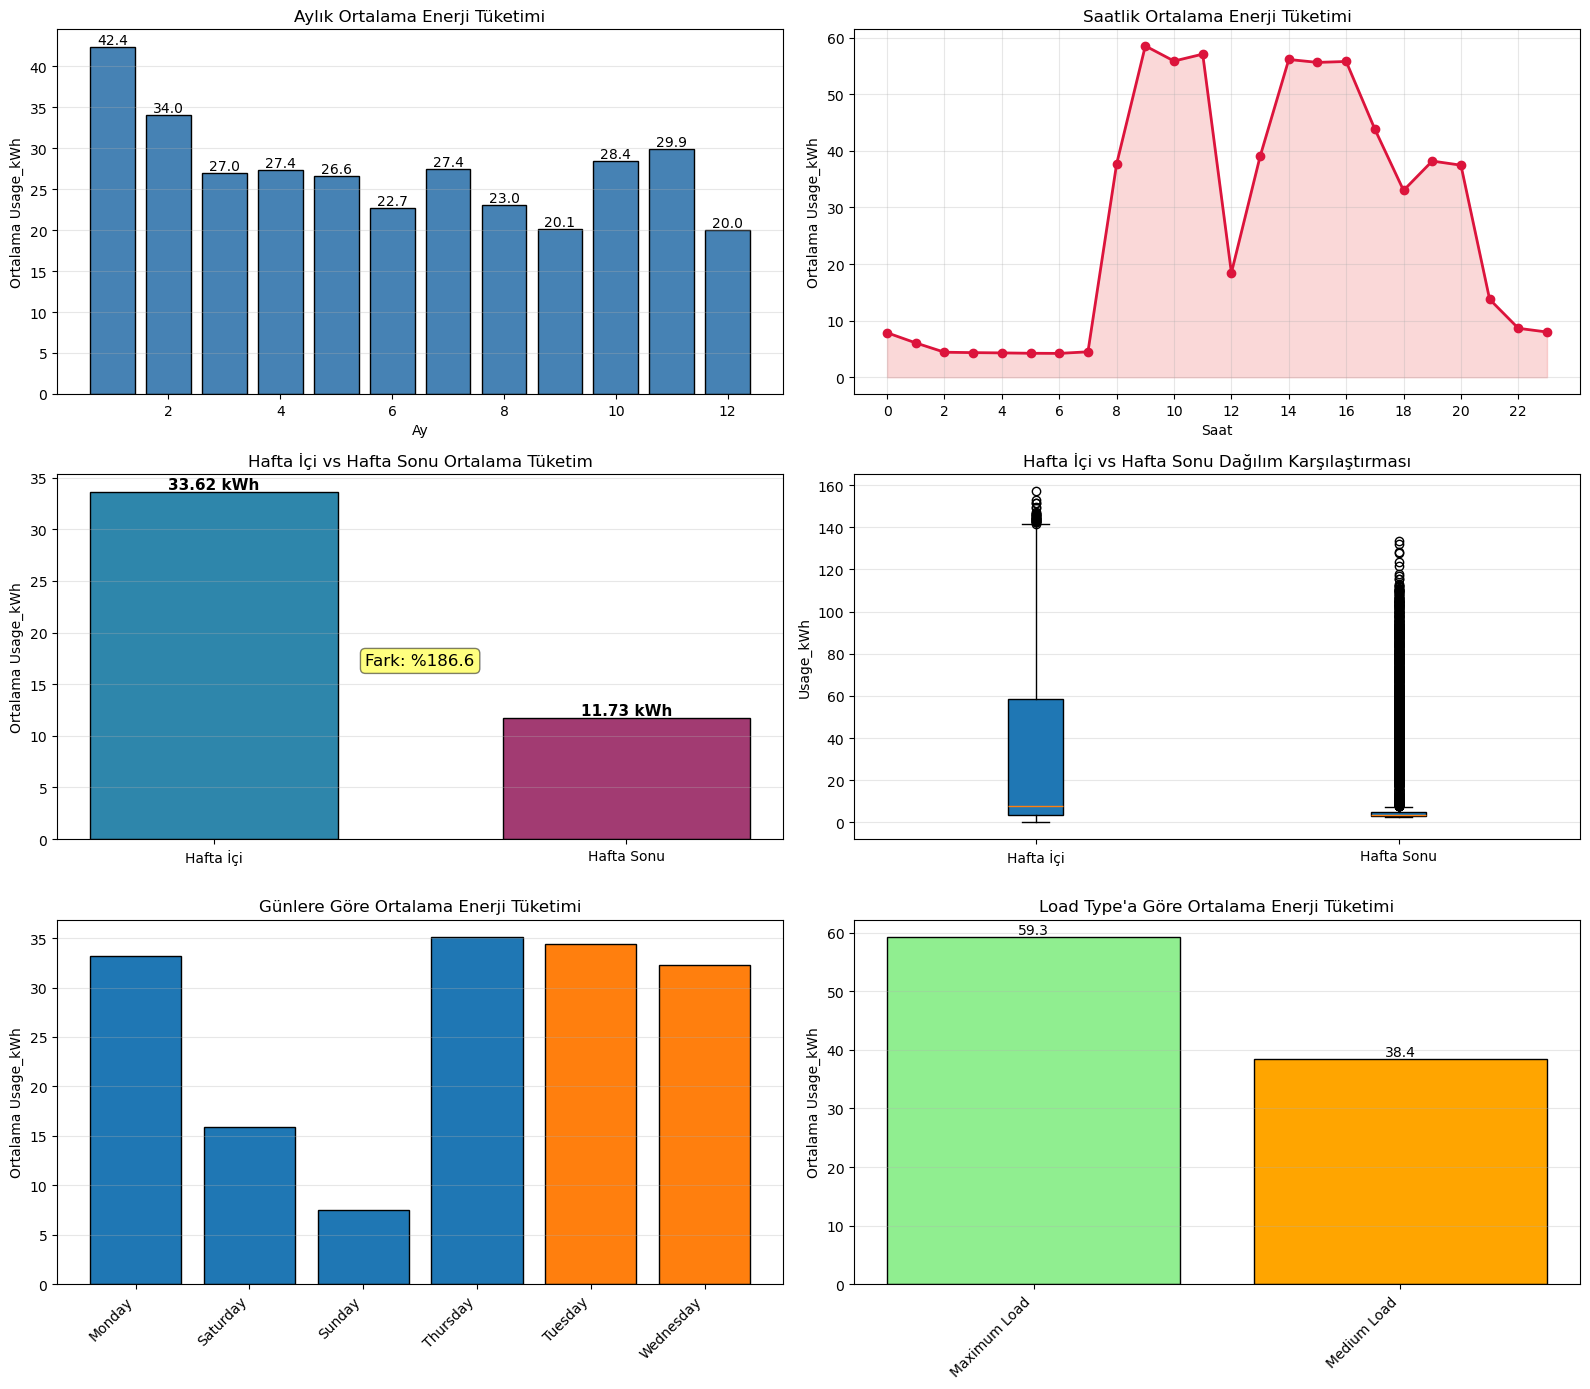


Detaylı İstatistikler:

Aylık Tüketim:
month
1     42.418780
2     34.039189
11    29.936670
10    28.449479
7     27.444358
4     27.350625
3     26.959143
5     26.565618
8     23.037443
6     22.709944
9     20.098288
12    19.972036


En Yüksek Tüketim Saatleri:
hour
9     58.551733
11    57.097459
14    56.155260
10    55.874733
16    55.799582


En Düşük Tüketim Saatleri:
hour
6    4.223705
5    4.245548
4    4.309438
3    4.358041
2    4.428390


Hafta İçi Ortalama: 33.62 kWh
Hafta Sonu Ortalama: 11.73 kWh
Fark: 21.89 kWh (%186.6)


Günlük Ortalamalar:
  Monday    : 33.14 kWh
  Saturday  : 15.92 kWh
  Sunday    : 7.55 kWh
  Thursday  : 35.11 kWh
  Tuesday   : 34.43 kWh
  Wednesday : 32.25 kWh


Load Type Ortalamaları:
  Maximum Load        : 59.27 kWh
  Medium Load         : 38.45 kWh


In [57]:
print("="*80)
print(" YENİ FEATURE'LAR İLE KARŞILAŞTIRMALI ANALİZ")
print("="*80)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# Aylık ortalama tüketim
monthly_avg = df.groupby("month")["Usage_kWh"].mean().sort_values(ascending=False)
axes[0, 0].bar(monthly_avg.index, monthly_avg.values, color="steelblue", edgecolor="black")
axes[0, 0].set_xlabel("Ay")
axes[0, 0].set_ylabel("Ortalama Usage_kWh")
axes[0, 0].set_title("Aylık Ortalama Enerji Tüketimi")
axes[0, 0].grid(True, alpha=0.3, axis="y")
for i, v in enumerate(monthly_avg.values):
    axes[0, 0].text(monthly_avg.index[i], v, f"{v:.1f}", ha="center", va="bottom")

# Saatlik ortalama tüketim
hourly_avg = df.groupby("hour")["Usage_kWh"].mean()
axes[0, 1].plot(hourly_avg.index, hourly_avg.values, marker="o", linewidth=2, markersize=6, color="crimson")
axes[0, 1].fill_between(hourly_avg.index, 0, hourly_avg.values, alpha=0.3, color="lightcoral")
axes[0, 1].set_xlabel("Saat")
axes[0, 1].set_ylabel("Ortalama Usage_kWh")
axes[0, 1].set_title("Saatlik Ortalama Enerji Tüketimi")
axes[0, 1].set_xticks(range(0, 24, 2))
axes[0, 1].grid(True, alpha=0.3)

# Hafta içi vs Hafta sonu
weekday_data = df[df["WeekStatus_Weekend"] == 0]["Usage_kWh"]
weekend_data = df[df["WeekStatus_Weekend"] == 1]["Usage_kWh"]

weekday_mean = weekday_data.mean()
weekend_mean = weekend_data.mean()

axes[1, 0].bar(["Hafta İçi", "Hafta Sonu"], [weekday_mean, weekend_mean], 
              color=["#2E86AB", "#A23B72"], edgecolor="black", width=0.6)
axes[1, 0].set_ylabel("Ortalama Usage_kWh")
axes[1, 0].set_title("Hafta İçi vs Hafta Sonu Ortalama Tüketim")
axes[1, 0].grid(True, alpha=0.3, axis="y")

for i, (label, value) in enumerate(zip(["Hafta İçi", "Hafta Sonu"], [weekday_mean, weekend_mean])):
    axes[1, 0].text(i, value, f"{value:.2f} kWh", ha="center", va="bottom", fontsize=11, fontweight="bold")
    
difference_pct = ((weekday_mean - weekend_mean) / weekend_mean) * 100
axes[1, 0].text(0.5, max(weekday_mean, weekend_mean) * 0.5, 
               f"Fark: %{difference_pct:.1f}", 
               ha="center", fontsize=12, bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.5))

# Hafta içi vs Hafta sonu box plot
axes[1, 1].boxplot([weekday_data, weekend_data], labels=["Hafta İçi", "Hafta Sonu"], patch_artist=True)
axes[1, 1].set_ylabel("Usage_kWh")
axes[1, 1].set_title("Hafta İçi vs Hafta Sonu Dağılım Karşılaştırması")
axes[1, 1].grid(True, alpha=0.3, axis="y")

# Günlere göre ortalama
day_columns = [col for col in df.columns if col.startswith("Day_of_week_")]
day_names = [col.replace("Day_of_week_", "") for col in day_columns]
day_means = []

for col in day_columns:
    day_means.append(df[df[col] == 1]["Usage_kWh"].mean())

axes[2, 0].bar(range(len(day_names)), day_means, 
              color=["#1f77b4" if i < 4 else "#ff7f0e" for i in range(len(day_names))], 
              edgecolor="black")
axes[2, 0].set_xticks(range(len(day_names)))
axes[2, 0].set_xticklabels(day_names, rotation=45, ha="right")
axes[2, 0].set_ylabel("Ortalama Usage_kWh")
axes[2, 0].set_title("Günlere Göre Ortalama Enerji Tüketimi")
axes[2, 0].grid(True, alpha=0.3, axis="y")

# Load Type'a göre ortalama
load_columns = [col for col in df.columns if col.startswith("Load_Type_")]
load_names = [col.replace("Load_Type_", "").replace("_", " ") for col in load_columns]
load_means = []

for col in load_columns:
    load_means.append(df[df[col] == 1]["Usage_kWh"].mean())

axes[2, 1].bar(range(len(load_names)), load_means, color=["lightgreen", "orange"][:len(load_names)], edgecolor="black")
axes[2, 1].set_xticks(range(len(load_names)))
axes[2, 1].set_xticklabels(load_names, rotation=45, ha="right")
axes[2, 1].set_ylabel("Ortalama Usage_kWh")
axes[2, 1].set_title("Load Type'a Göre Ortalama Enerji Tüketimi")
axes[2, 1].grid(True, alpha=0.3, axis="y")

for i, v in enumerate(load_means):
    axes[2, 1].text(i, v, f"{v:.1f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

print("\nDetaylı İstatistikler:")
print("="*80)
print(f"\nAylık Tüketim:")
print(monthly_avg.to_string())

print(f"\n\nEn Yüksek Tüketim Saatleri:")
print(hourly_avg.nlargest(5).to_string())

print(f"\n\nEn Düşük Tüketim Saatleri:")
print(hourly_avg.nsmallest(5).to_string())

print(f"\n\nHafta İçi Ortalama: {weekday_mean:.2f} kWh")
print(f"Hafta Sonu Ortalama: {weekend_mean:.2f} kWh")
print(f"Fark: {weekday_mean - weekend_mean:.2f} kWh (%{difference_pct:.1f})")

print(f"\n\nGünlük Ortalamalar:")
for name, mean in zip(day_names, day_means):
    print(f"  {name:10s}: {mean:.2f} kWh")

print(f"\n\nLoad Type Ortalamaları:")
for name, mean in zip(load_names, load_means):
    print(f"  {name:20s}: {mean:.2f} kWh")

In [58]:
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'year', 'month', 'day', 'hour', 'WeekStatus_Weekend',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')

In [59]:
df.head()

Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0       3.17                                  2.95   
1       4.00                                  4.46   
2       3.24                                  3.28   
3       3.31                                  3.56   
4       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  Lagging_Current_Power_Factor  year  \
0                                   0.0                         73.21  2018   
1                                   0.0                         66.77  2018   
2                                   0.0                         70.28  2018   
3                                   0.0                         68.09  2018   
4                                   0.0                         64.72  2018   

   month  day  hour  WeekStatus_Weekend  Day_of_week_Monday  \
0      1    1     0               False                True   
1      1    1     0               False                True   
2      1    1     0               False                True   
3      1    1     1               False                True   
4      1    1     1               False                True   

   Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   Day_of_week_Tuesday  Day_of_week_Wednesday  Load_Type_Maximum_Load  \
0                False                  False                   False   
1                False                  False                   False   
2                False                  False                   False   
3                False                  False                   False   
4                False                  False                   False   

   Load_Type_Medium_Load  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Lagging_Current_Power_Factor          35040 non-null  float64
 4   year                                  35040 non-null  int32  
 5   month                                 35040 non-null  int32  
 6   day                                   35040 non-null  int32  
 7   hour                                  35040 non-null  int64  
 8   WeekStatus_Weekend                    35040 non-null  bool   
 9   Day_of_week_Monday                    35040 non-null  bool   
 10  Day_of_week_Saturday                  35040 non-null  bool   
 11  Day_of_week_Sun

In [61]:
df_clean["WeekStatus"].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [62]:
X = df.drop(["Usage_kWh"],axis=1)
y= df["Usage_kWh"]

In [63]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=5,shuffle=False)

In [64]:
X_train

Lagging_Current_Reactive.Power_kVarh  \
0                                      2.95   
1                                      4.46   
2                                      3.28   
3                                      3.56   
4                                      4.50   
...                                     ...   
28027                                 44.42   
28028                                 42.37   
28029                                 48.82   
28030                                 38.66   
28031                                 56.16   

       Leading_Current_Reactive_Power_kVarh  Lagging_Current_Power_Factor  \
0                                       0.0                         73.21   
1                                       0.0                         66.77   
2                                       0.0                         70.28   
3                                       0.0                         68.09   
4                                       0.0                         64.72   
...                                     ...                           ...   
28027                                   0.0                         77.27   
28028                                   0.0                         70.77   
28029                                   0.0                         83.13   
28030                                   0.0                         84.54   
28031                                   0.0                         83.97   

       year  month  day  hour  WeekStatus_Weekend  Day_of_week_Monday  \
0      2018      1    1     0               False                True   
1      2018      1    1     0               False                True   
2      2018      1    1     0               False                True   
3      2018      1    1     1               False                True   
4      2018      1    1     1               False                True   
...     ...    ...  ...   ...                 ...                 ...   
28027  2018     10   19    23               False               False   
28028  2018     10   19    23               False               False   
28029  2018     10   19    23               False               False   
28030  2018     10   19    23               False               False   
28031  2018     10   19     0               False               False   

       Day_of_week_Saturday  Day_of_week_Sunday  Day_of_week_Thursday  \
0                     False               False                 False   
1                     False               False                 False   
2                     False               False                 False   
3                     False               False                 False   
4                     False               False                 False   
...                     ...                 ...                   ...   
28027                 False               False                 False   
28028                 False               False                 False   
28029                 False               False                 False   
28030                 False               False                 False   
28031                 False               False                 False   

       Day_of_week_Tuesday  Day_of_week_Wednesday  Load_Type_Maximum_Load  \
0                    False                  False                   False   
1                    False                  False                   False   
2                    False                  False                   False   
3                    False                  False                   False   
4                    False                  False                   False   
...                    ...                    ...                     ...   
28027                False                  False                   False   
28028                False                  False                   False   
28029                False                  False                   Fa

In [65]:
y_train

0         3.17
1         4.00
2         3.24
3         3.31
4         3.82
         ...  
28027    54.07
28028    42.44
28029    73.01
28030    61.20
28031    86.83
Name: Usage_kWh, Length: 28032, dtype: float64

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
pipelines = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(n_estimators=100, random_state=5))
    ]),
    
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingRegressor(n_estimators=100, random_state=5))
    ])
}

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grids = {
    "Linear Regression": {
        "model__fit_intercept": [True, False]
    },
    
    "Random Forest": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [10, 20, 30, None],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    },
    
    "Gradient Boosting": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7],
        "model__subsample": [0.8, 0.9, 1.0]
    }
}

best_models = {}
results = {}

for name, pipeline in pipelines.items():
    print(f"\n{'='*80}")
    print(f"{name} - Hyperparameter Tuning")
    print(f"{'='*80}")
    
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        verbose=1
    )
    
    print(f"{name} eğitiliyor...")
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    y_train_pred = best_models[name].predict(X_train)
    y_test_pred = best_models[name].predict(X_test)
    
    results[name] = {
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred)
    }
    
    print(f"\nEn iyi parametreler:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    print(f"\nTest MAE:  {results[name]['Test MAE']:.4f}")
    print(f"Test RMSE: {results[name]['Test RMSE']:.4f}")
    print(f"Test R2:   {results[name]['Test R2']:.4f}")




Linear Regression - Hyperparameter Tuning
Linear Regression eğitiliyor...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

En iyi parametreler:
  model__fit_intercept: True

Test MAE:  5.9574
Test RMSE: 8.1049
Test R2:   0.9333

Random Forest - Hyperparameter Tuning
Random Forest eğitiliyor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

En iyi parametreler:
  model__max_depth: 20
  model__min_samples_leaf: 2
  model__min_samples_split: 2
  model__n_estimators: 300

Test MAE:  0.8555
Test RMSE: 2.1912
Test R2:   0.9951

Gradient Boosting - Hyperparameter Tuning
Gradient Boosting eğitiliyor...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

En iyi parametreler:
  model__learning_rate: 0.05
  model__max_depth: 7
  model__n_estimators: 300
  model__subsample: 0.8

Test MAE:  0.9493
Test RMSE: 2.1255
Test R2:   0.9954

XGBoost - Hyperparameter Tuning
XGBoost eğitiliyor...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


AttributeError: module 'pandas' has no attribute 'util'

In [71]:
results_df = pd.DataFrame(results).T

results_df_sorted = results_df.sort_values("Test R2", ascending=False)

print("\n" + "="*80)
print(" MODEL KARŞILAŞTIRMASI (Test R2'ye Göre Sıralı)")
print("="*80)
print(results_df_sorted.round(4))

print("\n" + "="*80)
print(" EN İYİ PARAMETRELER")
print("="*80)

for name in results_df_sorted.index:
    print(f"\n{name}:")
    for param, value in best_models[name].named_steps["model"].get_params().items():
        if param in ["n_estimators", "max_depth", "learning_rate", "min_samples_split", 
                     "min_samples_leaf", "subsample", "colsample_bytree", "fit_intercept"]:
            print(f"  {param}: {value}")


 MODEL KARŞILAŞTIRMASI (Test R2'ye Göre Sıralı)
                   Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2  \
Gradient Boosting     0.3337    0.9493      0.6595     2.1255    0.9996   
Random Forest         0.2089    0.8555      0.7252     2.1912    0.9995   
Linear Regression     7.5345    5.9574     10.1586     8.1049    0.9103   

                   Test R2  
Gradient Boosting   0.9954  
Random Forest       0.9951  
Linear Regression   0.9333  

 EN İYİ PARAMETRELER

Gradient Boosting:
  learning_rate: 0.05
  max_depth: 7
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 300
  subsample: 0.8

Random Forest:
  max_depth: 20
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 300

Linear Regression:
  fit_intercept: True


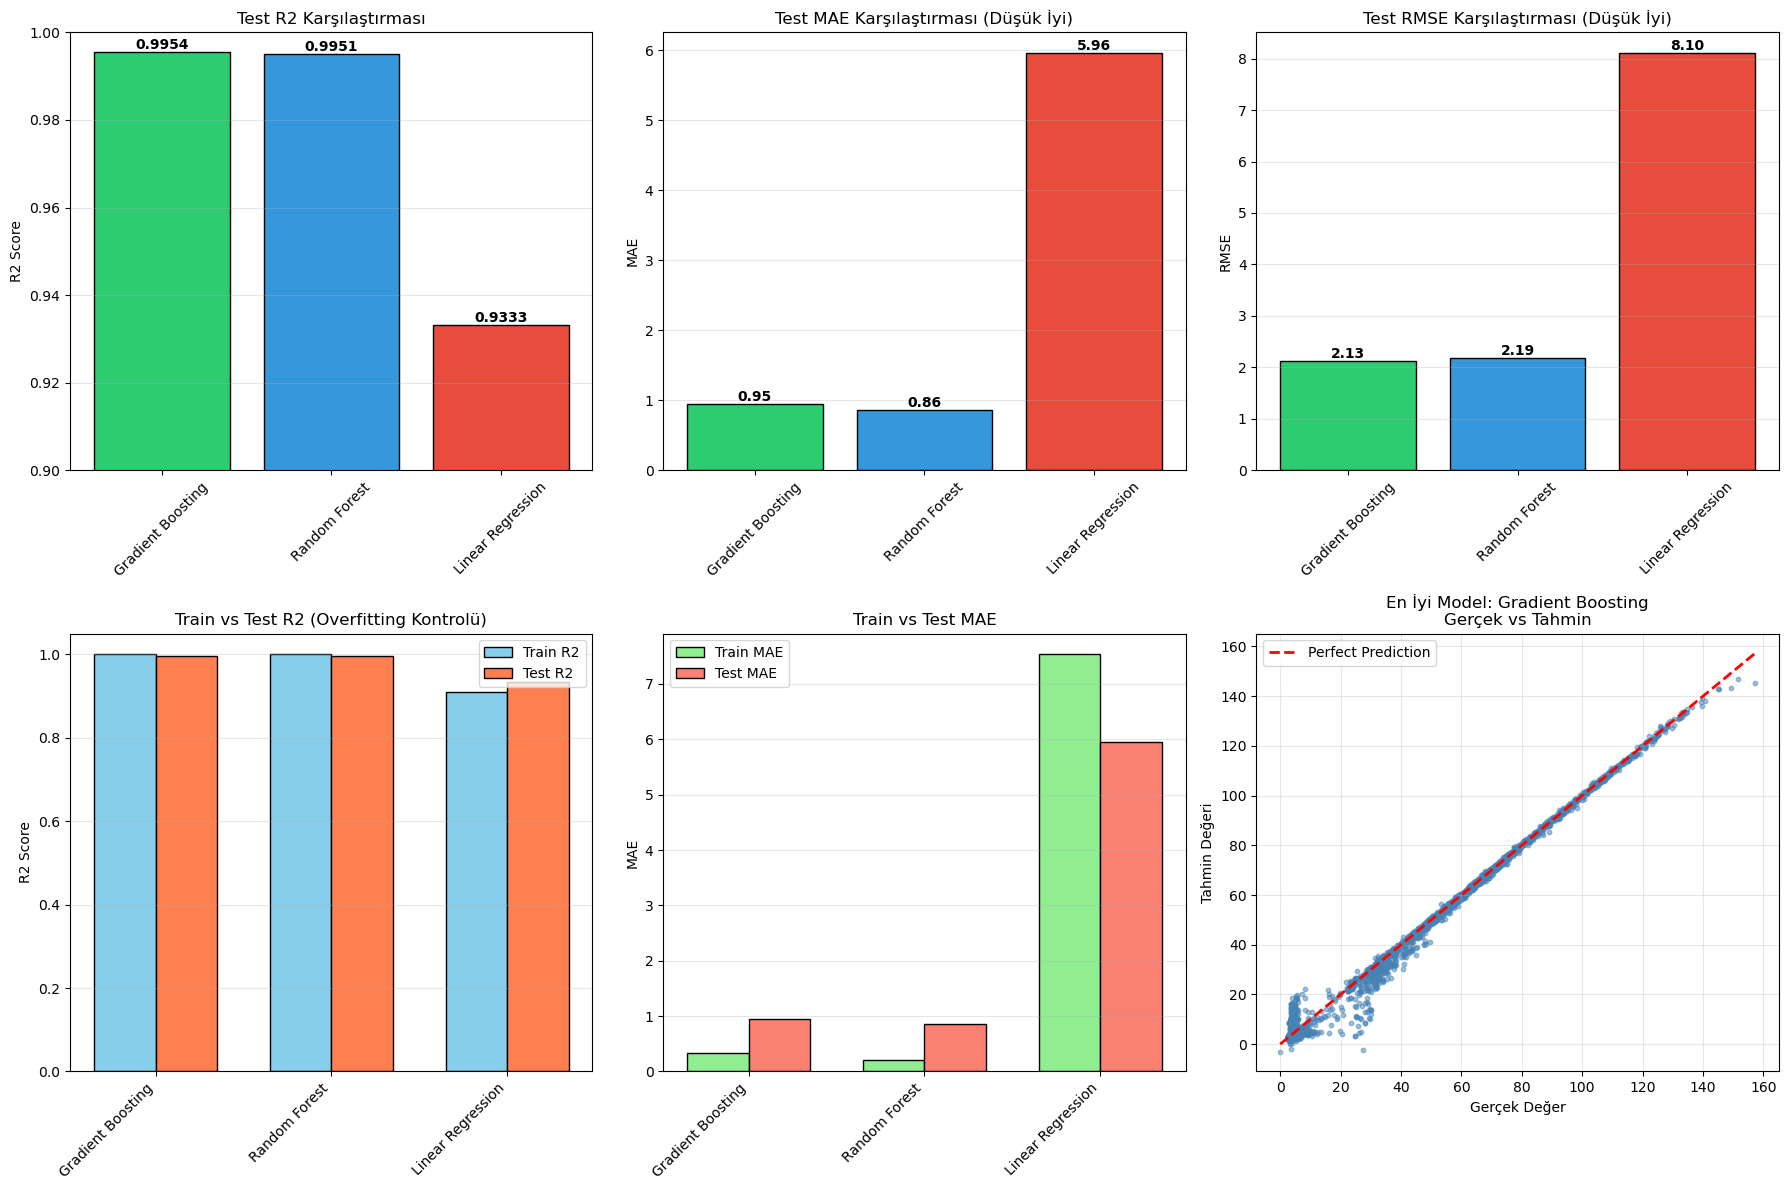

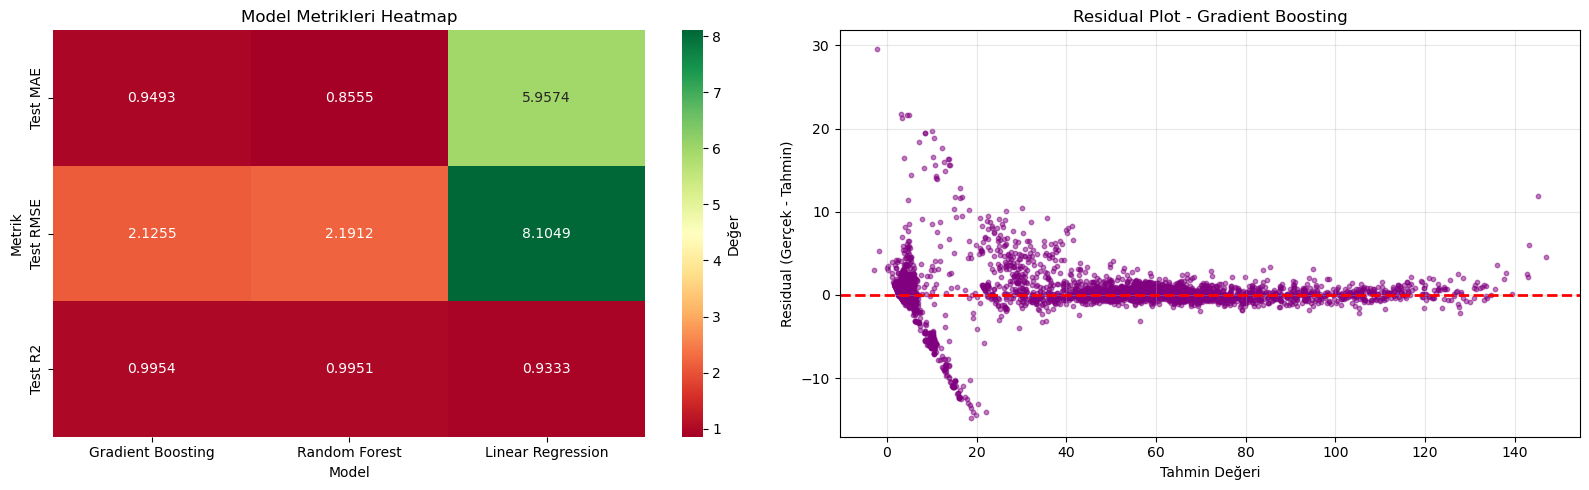


 ÖZET

En İyi Model: Gradient Boosting
Test R2: 0.9954
Test MAE: 0.9493
Test RMSE: 2.1255

Overfitting Skoru: 0.0042
Durum: İyi genelleme yapıyor


In [72]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

model_names = results_df_sorted.index.tolist()
colors = ["#2ecc71", "#3498db", "#e74c3c", "#f39c12"]

axes[0, 0].bar(model_names, results_df_sorted["Test R2"], color=colors, edgecolor="black")
axes[0, 0].set_ylabel("R2 Score")
axes[0, 0].set_title("Test R2 Karşılaştırması")
axes[0, 0].set_ylim([0.9, 1.0])
axes[0, 0].tick_params(axis="x", rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis="y")
for i, v in enumerate(results_df_sorted["Test R2"]):
    axes[0, 0].text(i, v, f"{v:.4f}", ha="center", va="bottom", fontweight="bold")

axes[0, 1].bar(model_names, results_df_sorted["Test MAE"], color=colors, edgecolor="black")
axes[0, 1].set_ylabel("MAE")
axes[0, 1].set_title("Test MAE Karşılaştırması (Düşük İyi)")
axes[0, 1].tick_params(axis="x", rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis="y")
for i, v in enumerate(results_df_sorted["Test MAE"]):
    axes[0, 1].text(i, v, f"{v:.2f}", ha="center", va="bottom", fontweight="bold")

axes[0, 2].bar(model_names, results_df_sorted["Test RMSE"], color=colors, edgecolor="black")
axes[0, 2].set_ylabel("RMSE")
axes[0, 2].set_title("Test RMSE Karşılaştırması (Düşük İyi)")
axes[0, 2].tick_params(axis="x", rotation=45)
axes[0, 2].grid(True, alpha=0.3, axis="y")
for i, v in enumerate(results_df_sorted["Test RMSE"]):
    axes[0, 2].text(i, v, f"{v:.2f}", ha="center", va="bottom", fontweight="bold")

x = np.arange(len(model_names))
width = 0.35

axes[1, 0].bar(x - width/2, results_df_sorted["Train R2"], width, label="Train R2", 
              color="skyblue", edgecolor="black")
axes[1, 0].bar(x + width/2, results_df_sorted["Test R2"], width, label="Test R2", 
              color="coral", edgecolor="black")
axes[1, 0].set_ylabel("R2 Score")
axes[1, 0].set_title("Train vs Test R2 (Overfitting Kontrolü)")
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(model_names, rotation=45, ha="right")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis="y")

axes[1, 1].bar(x - width/2, results_df_sorted["Train MAE"], width, label="Train MAE", 
              color="lightgreen", edgecolor="black")
axes[1, 1].bar(x + width/2, results_df_sorted["Test MAE"], width, label="Test MAE", 
              color="salmon", edgecolor="black")
axes[1, 1].set_ylabel("MAE")
axes[1, 1].set_title("Train vs Test MAE")
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(model_names, rotation=45, ha="right")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis="y")

best_model_name = results_df_sorted.index[0]
best_pipeline = best_models[best_model_name]

y_test_pred_best = best_pipeline.predict(X_test)

axes[1, 2].scatter(y_test, y_test_pred_best, alpha=0.5, s=10, color="steelblue")
axes[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
               "r--", linewidth=2, label="Perfect Prediction")
axes[1, 2].set_xlabel("Gerçek Değer")
axes[1, 2].set_ylabel("Tahmin Değeri")
axes[1, 2].set_title(f"En İyi Model: {best_model_name}\nGerçek vs Tahmin")
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

metrics_df = results_df_sorted[["Test MAE", "Test RMSE", "Test R2"]]
sns.heatmap(metrics_df.T, annot=True, fmt=".4f", cmap="RdYlGn", 
           ax=axes[0], cbar_kws={"label": "Değer"})
axes[0].set_title("Model Metrikleri Heatmap")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Metrik")

residuals = y_test - y_test_pred_best
axes[1].scatter(y_test_pred_best, residuals, alpha=0.5, s=10, color="purple")
axes[1].axhline(y=0, color="red", linestyle="--", linewidth=2)
axes[1].set_xlabel("Tahmin Değeri")
axes[1].set_ylabel("Residual (Gerçek - Tahmin)")
axes[1].set_title(f"Residual Plot - {best_model_name}")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" ÖZET")
print("="*80)
print(f"\nEn İyi Model: {best_model_name}")
print(f"Test R2: {results_df_sorted.loc[best_model_name, 'Test R2']:.4f}")
print(f"Test MAE: {results_df_sorted.loc[best_model_name, 'Test MAE']:.4f}")
print(f"Test RMSE: {results_df_sorted.loc[best_model_name, 'Test RMSE']:.4f}")

overfitting_score = results_df_sorted.loc[best_model_name, "Train R2"] - results_df_sorted.loc[best_model_name, "Test R2"]
print(f"\nOverfitting Skoru: {overfitting_score:.4f}")
if overfitting_score < 0.05:
    print("Durum: İyi genelleme yapıyor")
elif overfitting_score < 0.10:
    print("Durum: Kabul edilebilir")
else:
    print("Durum: Overfitting var, dikkat!")

 FEATURE IMPORTANCE ANALİZİ

Gradient Boosting - Feature Importance (Top 20):
                             Feature  Importance
Lagging_Current_Reactive.Power_kVarh    0.866634
        Lagging_Current_Power_Factor    0.093636
Leading_Current_Reactive_Power_kVarh    0.012936
              Load_Type_Maximum_Load    0.012176
               Load_Type_Medium_Load    0.007317
                               month    0.003327
                                hour    0.002872
                  WeekStatus_Weekend    0.000564
                                 day    0.000220
                  Day_of_week_Sunday    0.000194
                Day_of_week_Saturday    0.000042
               Day_of_week_Wednesday    0.000028
                 Day_of_week_Tuesday    0.000021
                  Day_of_week_Monday    0.000019
                Day_of_week_Thursday    0.000014
                                year    0.000000


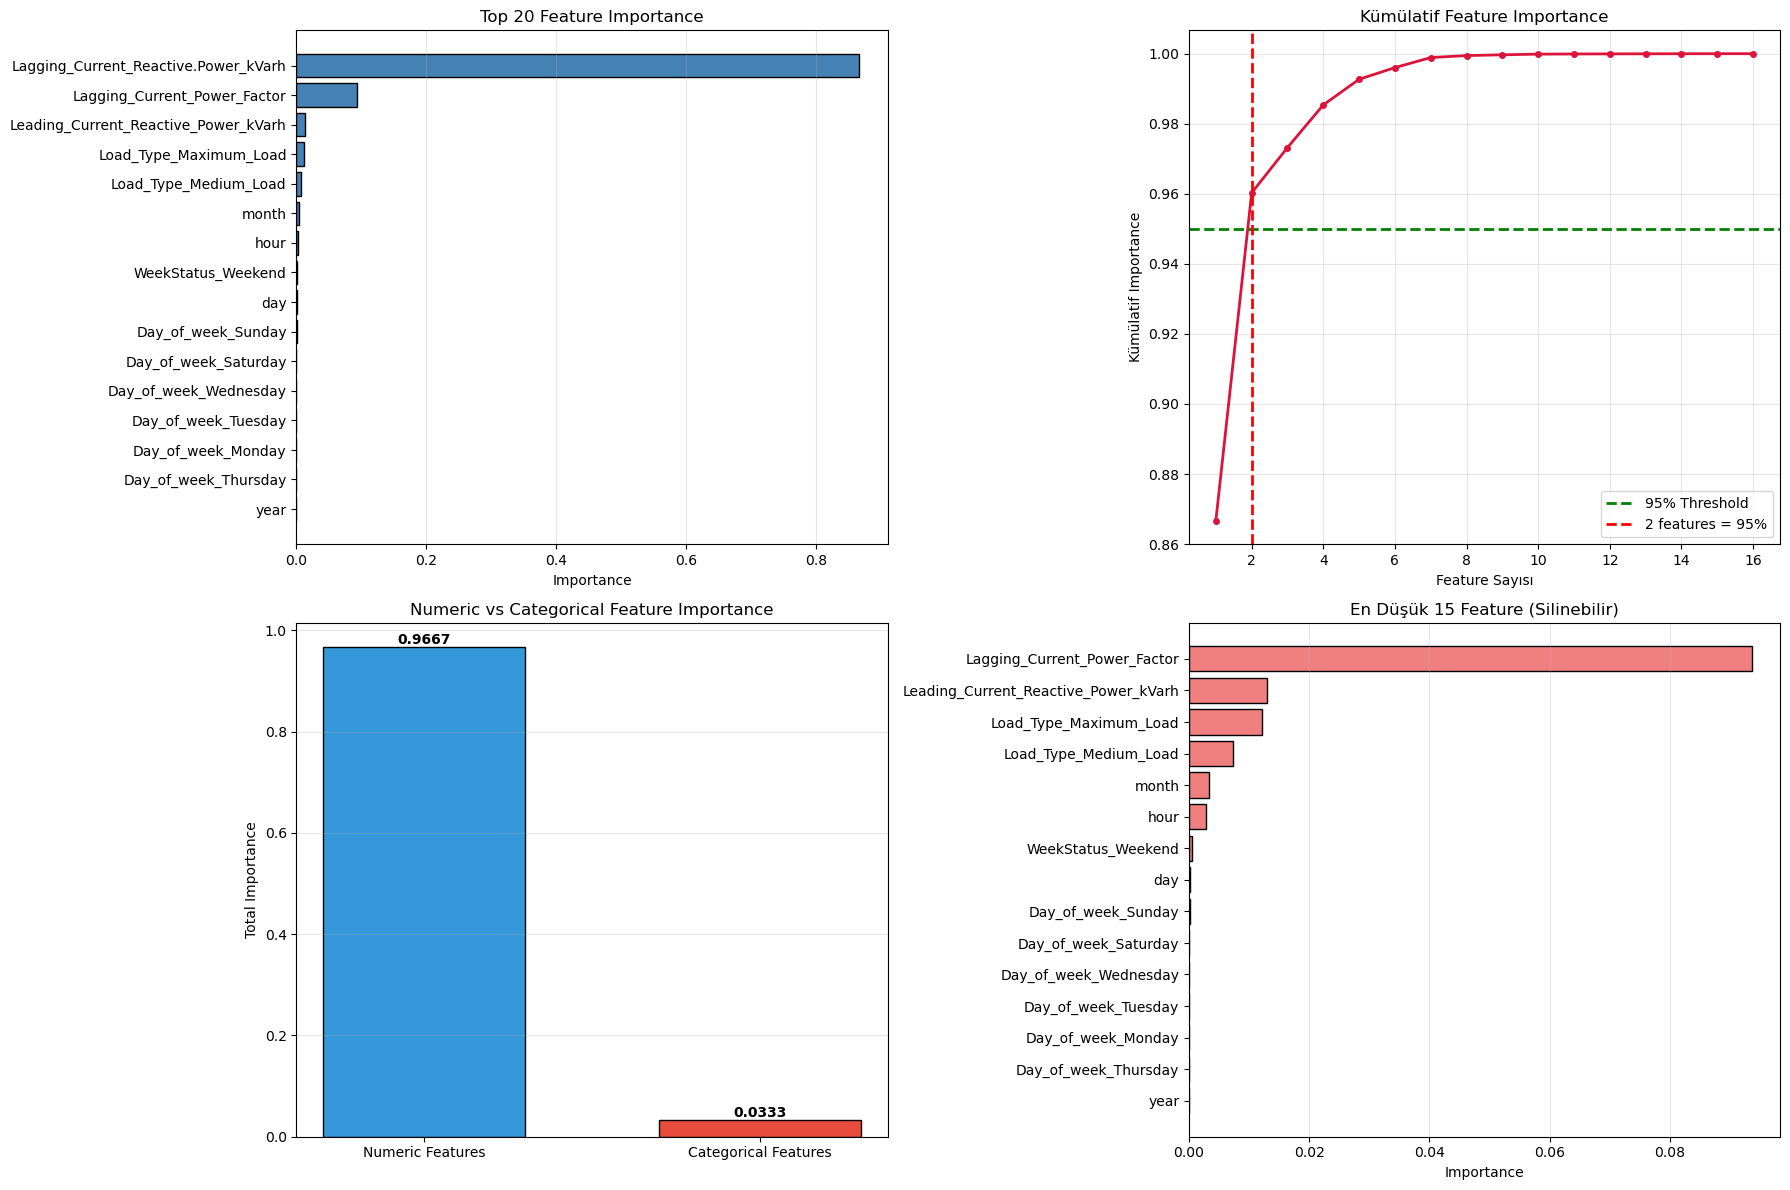


2 feature ile modelin %95'i açıklanabilir
Toplam feature sayısı: 16
Azaltılabilir feature sayısı: 14

Numeric Feature Importance Toplamı: 0.9667
Categorical Feature Importance Toplamı: 0.0333

Çok Düşük Importance (0.001 altı) - Silinebilir:
Feature Sayısı: 9
['WeekStatus_Weekend', 'day', 'Day_of_week_Sunday', 'Day_of_week_Saturday', 'Day_of_week_Wednesday', 'Day_of_week_Tuesday', 'Day_of_week_Monday', 'Day_of_week_Thursday', 'year']


In [73]:
print("="*80)
print(" FEATURE IMPORTANCE ANALİZİ")
print("="*80)

best_model_name = results_df_sorted.index[0]
best_pipeline = best_models[best_model_name]

best_model_obj = best_pipeline.named_steps["model"]

if hasattr(best_model_obj, "feature_importances_"):
    
    feature_names = X_train.columns.tolist()
    importances = best_model_obj.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values("Importance", ascending=False)
    
    print(f"\n{best_model_name} - Feature Importance (Top 20):")
    print(feature_importance_df.head(20).to_string(index=False))
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    top_n = 20
    top_features = feature_importance_df.head(top_n)
    
    axes[0, 0].barh(range(len(top_features)), top_features["Importance"], color="steelblue", edgecolor="black")
    axes[0, 0].set_yticks(range(len(top_features)))
    axes[0, 0].set_yticklabels(top_features["Feature"])
    axes[0, 0].invert_yaxis()
    axes[0, 0].set_xlabel("Importance")
    axes[0, 0].set_title(f"Top {top_n} Feature Importance")
    axes[0, 0].grid(True, alpha=0.3, axis="x")
    
    cumulative_importance = np.cumsum(feature_importance_df["Importance"].values)
    axes[0, 1].plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 
                   marker="o", linewidth=2, markersize=4, color="crimson")
    axes[0, 1].axhline(y=0.95, color="green", linestyle="--", linewidth=2, label="95% Threshold")
    axes[0, 1].set_xlabel("Feature Sayısı")
    axes[0, 1].set_ylabel("Kümülatif Importance")
    axes[0, 1].set_title("Kümülatif Feature Importance")
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    n_features_95 = np.argmax(cumulative_importance >= 0.95) + 1
    axes[0, 1].axvline(x=n_features_95, color="red", linestyle="--", linewidth=2, 
                      label=f"{n_features_95} features = 95%")
    axes[0, 1].legend()
    
    numeric_features = feature_importance_df[
        feature_importance_df["Feature"].isin([
            "Lagging_Current_Reactive.Power_kVarh",
            "Lagging_Current_Power_Factor",
            "month", "day", "hour"
        ])
    ]
    
    categorical_features = feature_importance_df[
        ~feature_importance_df["Feature"].isin(numeric_features["Feature"])
    ]
    
    axes[1, 0].bar(["Numeric Features", "Categorical Features"], 
                  [numeric_features["Importance"].sum(), categorical_features["Importance"].sum()],
                  color=["#3498db", "#e74c3c"], edgecolor="black", width=0.6)
    axes[1, 0].set_ylabel("Total Importance")
    axes[1, 0].set_title("Numeric vs Categorical Feature Importance")
    axes[1, 0].grid(True, alpha=0.3, axis="y")
    
    for i, v in enumerate([numeric_features["Importance"].sum(), categorical_features["Importance"].sum()]):
        axes[1, 0].text(i, v, f"{v:.4f}", ha="center", va="bottom", fontweight="bold")
    
    bottom_features = feature_importance_df.tail(15)
    axes[1, 1].barh(range(len(bottom_features)), bottom_features["Importance"], 
                   color="lightcoral", edgecolor="black")
    axes[1, 1].set_yticks(range(len(bottom_features)))
    axes[1, 1].set_yticklabels(bottom_features["Feature"])
    axes[1, 1].invert_yaxis()
    axes[1, 1].set_xlabel("Importance")
    axes[1, 1].set_title("En Düşük 15 Feature (Silinebilir)")
    axes[1, 1].grid(True, alpha=0.3, axis="x")
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{n_features_95} feature ile modelin %95'i açıklanabilir")
    print(f"Toplam feature sayısı: {len(feature_importance_df)}")
    print(f"Azaltılabilir feature sayısı: {len(feature_importance_df) - n_features_95}")
    
    print(f"\nNumeric Feature Importance Toplamı: {numeric_features['Importance'].sum():.4f}")
    print(f"Categorical Feature Importance Toplamı: {categorical_features['Importance'].sum():.4f}")
    
    threshold = 0.001
    low_importance_features = feature_importance_df[feature_importance_df["Importance"] < threshold]
    
    print(f"\nÇok Düşük Importance ({threshold} altı) - Silinebilir:")
    print(f"Feature Sayısı: {len(low_importance_features)}")
    if len(low_importance_features) > 0:
        print(low_importance_features["Feature"].tolist())
    
else:
    print(f"\n{best_model_name} modeli feature importance desteklemiyor")

In [74]:
import os
import joblib

print("="*80)
print(" MODEL KAYDETME")
print("="*80)

best_model_name = results_df_sorted.index[0]
best_pipeline = best_models[best_model_name]

model_filename = f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl"

joblib.dump(best_pipeline, model_filename)

print(f"\nEn iyi model kaydedildi: {model_filename}")
print(f"Model: {best_model_name}")
print(f"Test R2: {results_df_sorted.loc[best_model_name, 'Test R2']:.4f}")
print(f"Test MAE: {results_df_sorted.loc[best_model_name, 'Test MAE']:.4f}")

model_size_mb = os.path.getsize(model_filename) / (1024 * 1024)
print(f"Dosya Boyutu: {model_size_mb:.2f} MB")

print("\nModel Yükleme Örneği:")
print(f"loaded_model = joblib.load('{model_filename}')")
print("y_pred = loaded_model.predict(X_new)")

loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test[:5])

print("\nTest: Model başarıyla yüklendi ve tahmin yaptı")
print(f"İlk 5 tahmin: {test_prediction}")
print(f"İlk 5 gerçek: {y_test.iloc[:5].values}")

print("\n" + "="*80)
print(" MODEL BİLGİLERİ")
print("="*80)

print(f"\nPipeline Adımları:")
for step_name, step_obj in best_pipeline.named_steps.items():
    print(f"  - {step_name}: {type(step_obj).__name__}")

print(f"\nModel Parametreleri:")
model_params = best_pipeline.named_steps["model"].get_params()
important_params = ["n_estimators", "max_depth", "learning_rate", "min_samples_split", 
                   "min_samples_leaf", "subsample", "colsample_bytree"]
for param in important_params:
    if param in model_params:
        print(f"  {param}: {model_params[param]}")

print(f"\nFeature Sayısı: {X_train.shape[1]}")
print(f"Train Veri Sayısı: {X_train.shape[0]}")
print(f"Test Veri Sayısı: {X_test.shape[0]}")

 MODEL KAYDETME

En iyi model kaydedildi: best_model_gradient_boosting.pkl
Model: Gradient Boosting
Test R2: 0.9954
Test MAE: 0.9493
Dosya Boyutu: 6.08 MB

Model Yükleme Örneği:
loaded_model = joblib.load('best_model_gradient_boosting.pkl')
y_pred = loaded_model.predict(X_new)

Test: Model başarıyla yüklendi ve tahmin yaptı
İlk 5 tahmin: [65.16987531 45.142191   19.58507908  7.15458825  6.04178394]
İlk 5 gerçek: [64.33 45.22 19.84  7.09  5.72]

 MODEL BİLGİLERİ

Pipeline Adımları:
  - scaler: StandardScaler
  - model: GradientBoostingRegressor

Model Parametreleri:
  n_estimators: 300
  max_depth: 7
  learning_rate: 0.05
  min_samples_split: 2
  min_samples_leaf: 1
  subsample: 0.8

Feature Sayısı: 16
Train Veri Sayısı: 28032
Test Veri Sayısı: 7008


 ZAMAN SERİSİ TAHMİN GÖRSELLEŞTİRME


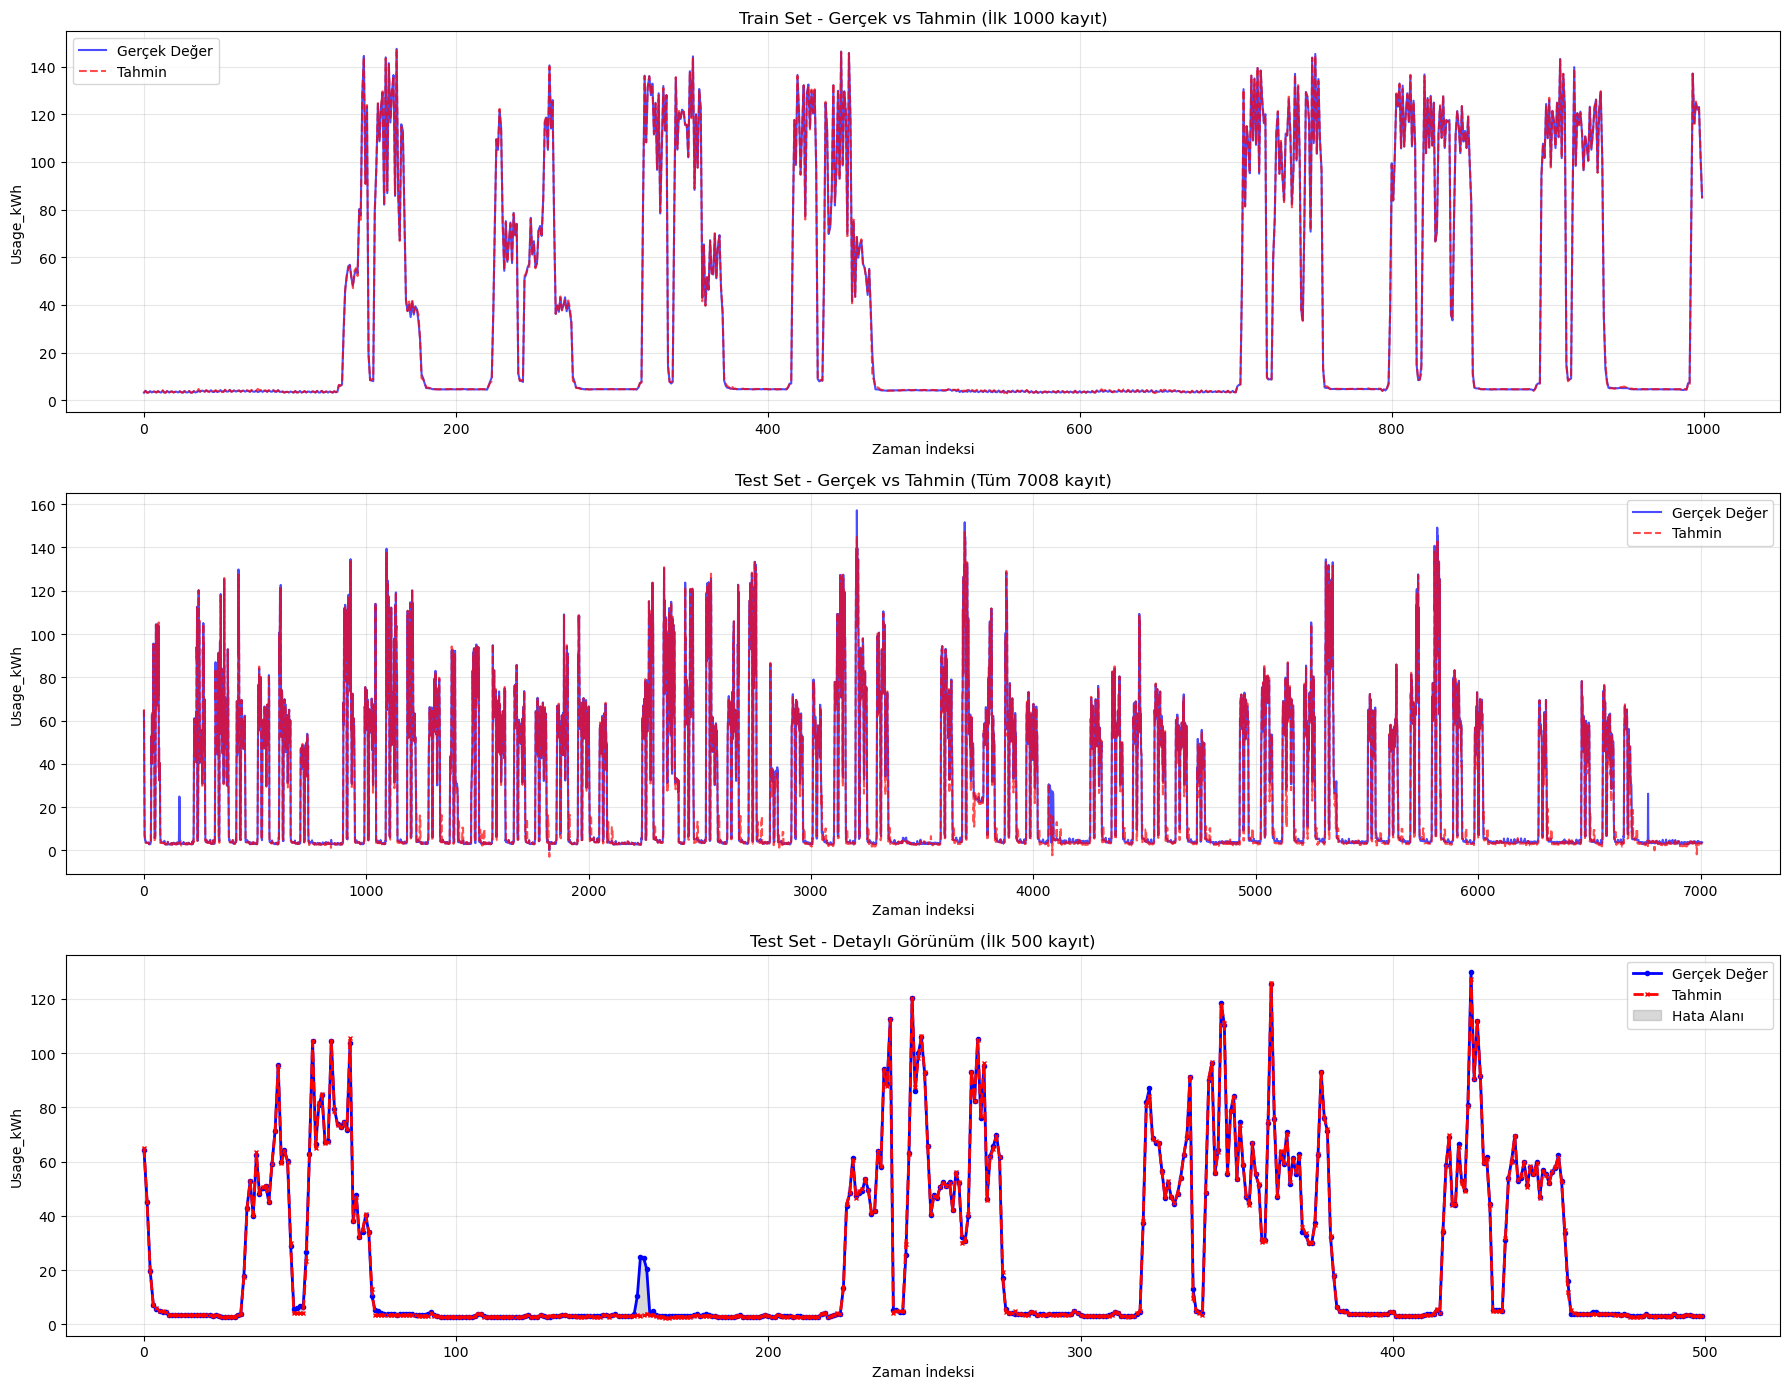

C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\2595302954.py:83: RuntimeWarning: divide by zero encountered in divide
  percent_errors = (errors / y_test.values) * 100


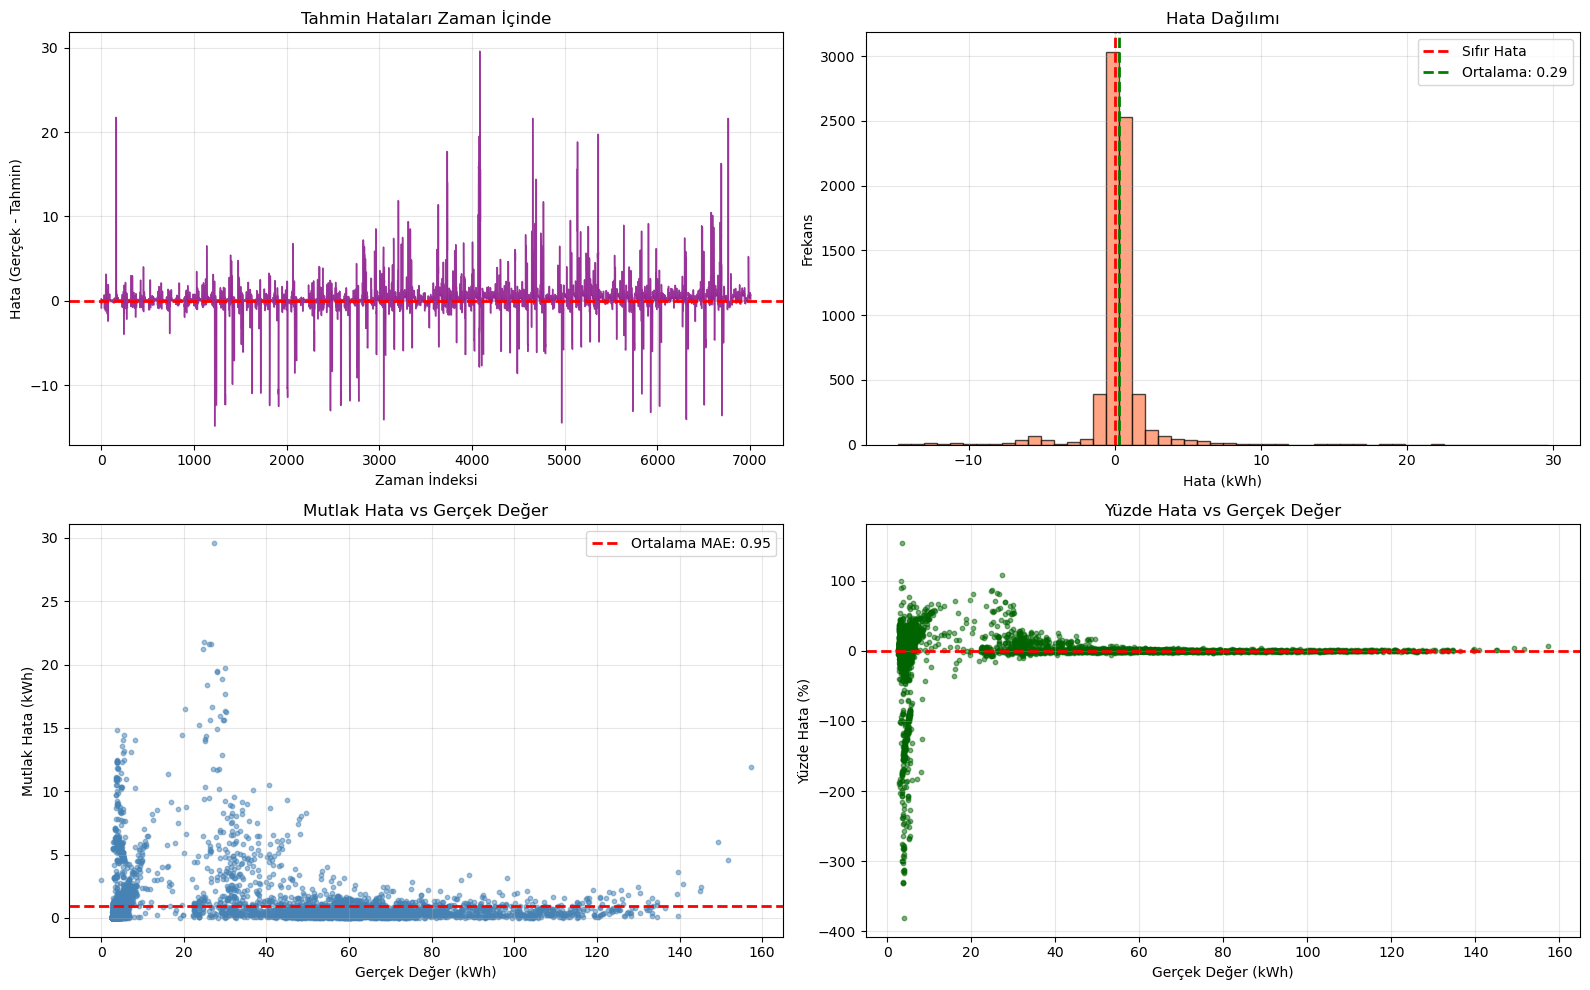


 HATA ANALİZİ

Ortalama Hata: 0.2888 kWh
Median Hata: 0.2264 kWh
Std Hata: 2.1057 kWh
Min Hata: -14.8291 kWh
Max Hata: 29.5955 kWh

Ortalama Mutlak Hata: 0.9493 kWh
Ortalama Yüzde Hata: inf%

En Kötü 10 Tahmin:
      Gerçek  Tahmin   Hata  Mutlak_Hata
4085   27.29   -2.31  29.60        29.60
159    24.88    3.13  21.75        21.75
4656   26.60    4.96  21.64        21.64
6764   26.17    4.54  21.63        21.63
160    24.62    3.38  21.24        21.24
5360   29.88   10.12  19.76        19.76
4077   27.94    8.43  19.51        19.51
4076   27.94    8.49  19.45        19.45
5139   29.30   10.46  18.84        18.84
4078   25.63    7.27  18.36        18.36


In [75]:
print("="*80)
print(" ZAMAN SERİSİ TAHMİN GÖRSELLEŞTİRME")
print("="*80)

best_model_name = results_df_sorted.index[0]
best_pipeline = best_models[best_model_name]

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

fig, axes = plt.subplots(3, 1, figsize=(18, 14))

sample_size = min(1000, len(y_train))
axes[0].plot(range(sample_size), y_train.iloc[:sample_size].values, 
            label="Gerçek Değer", color="blue", linewidth=1.5, alpha=0.7)
axes[0].plot(range(sample_size), y_train_pred[:sample_size], 
            label="Tahmin", color="red", linewidth=1.5, alpha=0.7, linestyle="--")
axes[0].set_xlabel("Zaman İndeksi")
axes[0].set_ylabel("Usage_kWh")
axes[0].set_title(f"Train Set - Gerçek vs Tahmin (İlk {sample_size} kayıt)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(len(y_test)), y_test.values, 
            label="Gerçek Değer", color="blue", linewidth=1.5, alpha=0.7)
axes[1].plot(range(len(y_test)), y_test_pred, 
            label="Tahmin", color="red", linewidth=1.5, alpha=0.7, linestyle="--")
axes[1].set_xlabel("Zaman İndeksi")
axes[1].set_ylabel("Usage_kWh")
axes[1].set_title(f"Test Set - Gerçek vs Tahmin (Tüm {len(y_test)} kayıt)")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

test_sample = min(500, len(y_test))
axes[2].plot(range(test_sample), y_test.iloc[:test_sample].values, 
            label="Gerçek Değer", color="blue", linewidth=2, marker="o", markersize=3)
axes[2].plot(range(test_sample), y_test_pred[:test_sample], 
            label="Tahmin", color="red", linewidth=2, marker="x", markersize=3, linestyle="--")
axes[2].fill_between(range(test_sample), 
                     y_test.iloc[:test_sample].values, 
                     y_test_pred[:test_sample],
                     alpha=0.3, color="gray", label="Hata Alanı")
axes[2].set_xlabel("Zaman İndeksi")
axes[2].set_ylabel("Usage_kWh")
axes[2].set_title(f"Test Set - Detaylı Görünüm (İlk {test_sample} kayıt)")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

errors = y_test.values - y_test_pred
axes[0, 0].plot(range(len(errors)), errors, color="purple", linewidth=1, alpha=0.7)
axes[0, 0].axhline(y=0, color="red", linestyle="--", linewidth=2)
axes[0, 0].fill_between(range(len(errors)), 0, errors, alpha=0.3, color="purple")
axes[0, 0].set_xlabel("Zaman İndeksi")
axes[0, 0].set_ylabel("Hata (Gerçek - Tahmin)")
axes[0, 0].set_title("Tahmin Hataları Zaman İçinde")
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(errors, bins=50, color="coral", edgecolor="black", alpha=0.7)
axes[0, 1].axvline(x=0, color="red", linestyle="--", linewidth=2, label="Sıfır Hata")
axes[0, 1].axvline(x=errors.mean(), color="green", linestyle="--", linewidth=2, 
                  label=f"Ortalama: {errors.mean():.2f}")
axes[0, 1].set_xlabel("Hata (kWh)")
axes[0, 1].set_ylabel("Frekans")
axes[0, 1].set_title("Hata Dağılımı")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

abs_errors = np.abs(errors)
axes[1, 0].scatter(y_test.values, abs_errors, alpha=0.5, s=10, color="steelblue")
axes[1, 0].axhline(y=abs_errors.mean(), color="red", linestyle="--", linewidth=2, 
                  label=f"Ortalama MAE: {abs_errors.mean():.2f}")
axes[1, 0].set_xlabel("Gerçek Değer (kWh)")
axes[1, 0].set_ylabel("Mutlak Hata (kWh)")
axes[1, 0].set_title("Mutlak Hata vs Gerçek Değer")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

percent_errors = (errors / y_test.values) * 100
axes[1, 1].scatter(y_test.values, percent_errors, alpha=0.5, s=10, color="darkgreen")
axes[1, 1].axhline(y=0, color="red", linestyle="--", linewidth=2)
axes[1, 1].set_xlabel("Gerçek Değer (kWh)")
axes[1, 1].set_ylabel("Yüzde Hata (%)")
axes[1, 1].set_title("Yüzde Hata vs Gerçek Değer")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" HATA ANALİZİ")
print("="*80)

print(f"\nOrtalama Hata: {errors.mean():.4f} kWh")
print(f"Median Hata: {np.median(errors):.4f} kWh")
print(f"Std Hata: {errors.std():.4f} kWh")
print(f"Min Hata: {errors.min():.4f} kWh")
print(f"Max Hata: {errors.max():.4f} kWh")

print(f"\nOrtalama Mutlak Hata: {abs_errors.mean():.4f} kWh")
print(f"Ortalama Yüzde Hata: {np.abs(percent_errors).mean():.2f}%")

worst_predictions = pd.DataFrame({
    "Gerçek": y_test.values,
    "Tahmin": y_test_pred,
    "Hata": errors,
    "Mutlak_Hata": abs_errors
}).nlargest(10, "Mutlak_Hata")

print("\nEn Kötü 10 Tahmin:")
print(worst_predictions.round(2))

 BUSİNESS VALUE ANALİZİ 

Elektrik Fiyatı: 5.5 TL/kWh

Test Dönemi Toplam Gerçek Tüketim: 176,824.97 kWh
Test Dönemi Toplam Tahmin Tüketim: 174,801.32 kWh
Fark: 2,023.65 kWh

Toplam Tahmin Hatası: 6,652.59 kWh
Toplam Hata Maliyeti: 36,589.24 TL

Test Süresi: 73.0 gün
Günlük Ortalama Hata: 91.13 kWh
Günlük Ortalama Hata Maliyeti: 501.22 TL

Aylık Tahmin Hata Maliyeti: 15,036.67 TL
Yıllık Tahmin Hata Maliyeti: 182,946.19 TL

 PEAK/OFF-PEAK OPTİMİZASYON SENARYOSU

Peak Saatler: [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Peak Fiyat: 7.0 TL/kWh
Off-Peak Fiyat: 4.0 TL/kWh

Mevcut Durum:
  Peak Tüketim: 143,384.34 kWh
  Off-Peak Tüketim: 33,440.63 kWh
  Toplam Maliyet: 1,137,452.90 TL

Optimize Edilmiş Durum (%20 kaydırma):
  Peak Tüketim: 114,707.47 kWh (-28,676.87)
  Off-Peak Tüketim: 62,117.50 kWh (+28,676.87)
  Toplam Maliyet: 1,051,422.30 TL

Tasarruf:
  Test Dönemi: 86,030.60 TL
  Günlük: 1,178.50 TL
  Aylık: 35,355.04 TL
  Yıllık: 430,153.02 TL

 ANOMALİ TESPİTİ VE UYARI SİSTEMİ

Anoma

C:\Users\bugra\AppData\Local\Temp\ipykernel_21880\2283506765.py:136: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100


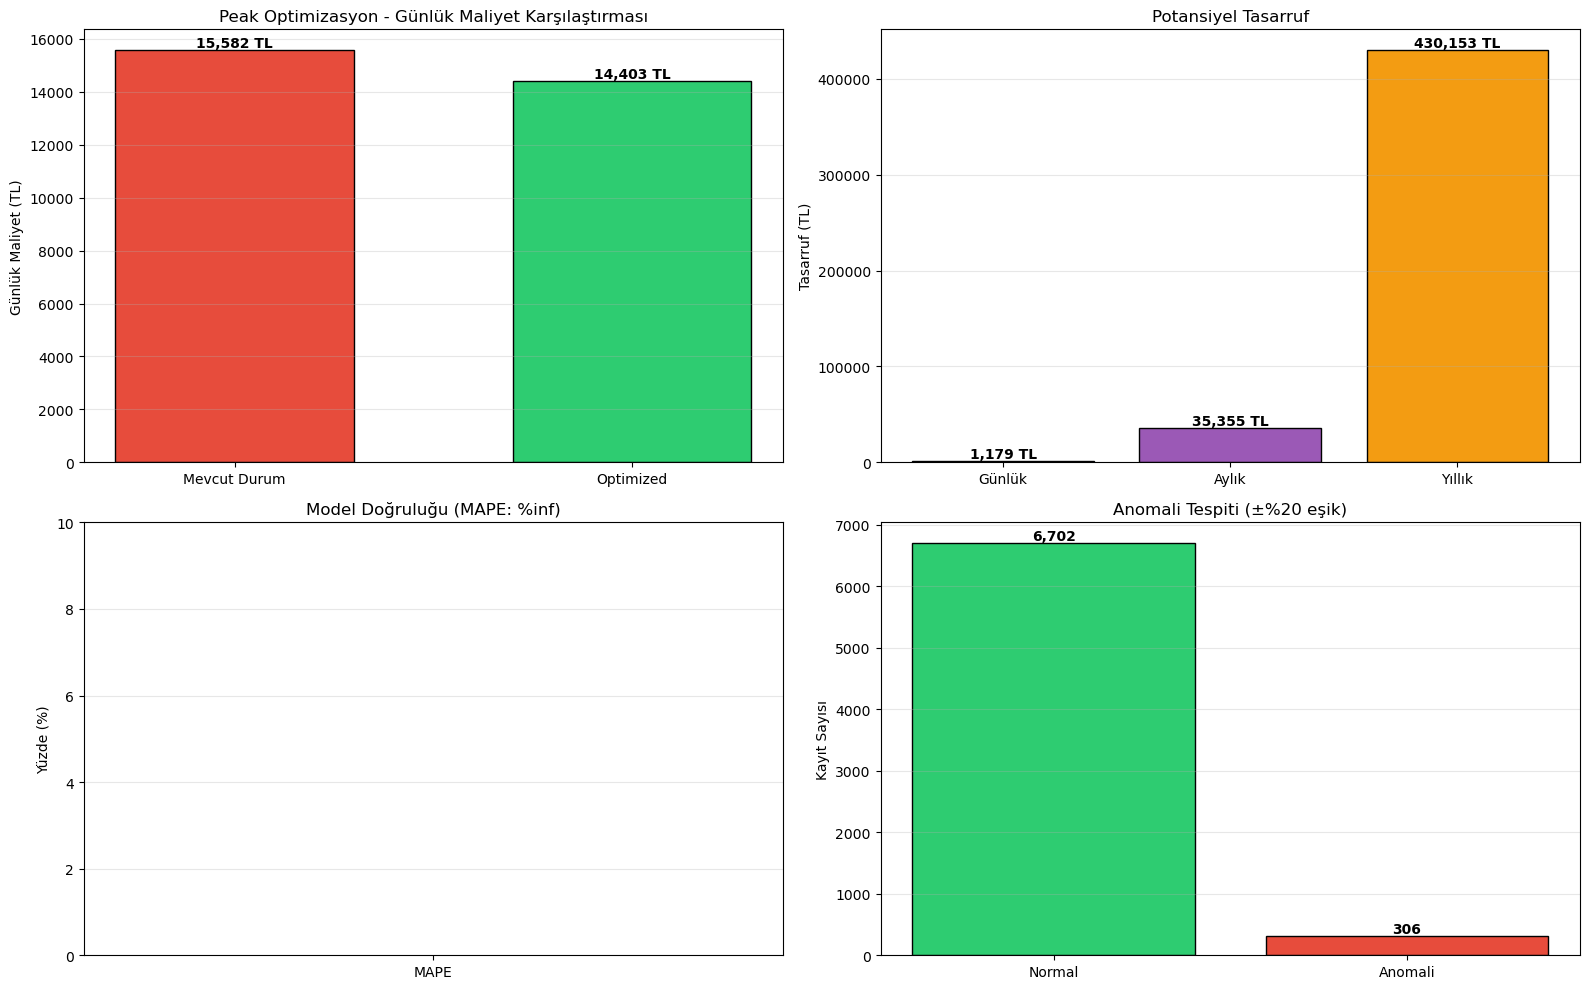


  İÇİN ÖZET

Model Performansı:
  - R2 Score: %99.54
  - MAPE: %inf
  - Günlük Ortalama Hata: 91.13 kWh

Potansiyel Tasarruf:
  - Günlük: 1,179 TL
  - Aylık: 35,355 TL
  - Yıllık: 430,153 TL

Anomali Tespiti:
  - Tespit Edilen Anomali: 306 kayıt (%4.4)
  - Erken uyarı sistemi ile müdahale imkanı

İş Değeri:
  - Enerji tüketimi %-inf doğrulukla tahmin edilebilir
  - Peak saatlerde tüketim kaydırılarak tasarruf sağlanabilir
  - Anormal tüketim pattern'leri otomatik tespit edilebilir
  - Proaktif enerji yönetimi mümkün


In [76]:
print("="*80)
print(" BUSİNESS VALUE ANALİZİ ")
print("="*80)

electricity_price_per_kwh = 5.5

total_actual_consumption = y_test.sum()
total_predicted_consumption = y_test_pred.sum()

prediction_error_kwh = np.abs(y_test.values - y_test_pred).sum()
prediction_error_cost = prediction_error_kwh * electricity_price_per_kwh

print(f"\nElektrik Fiyatı: {electricity_price_per_kwh} TL/kWh")
print(f"\nTest Dönemi Toplam Gerçek Tüketim: {total_actual_consumption:,.2f} kWh")
print(f"Test Dönemi Toplam Tahmin Tüketim: {total_predicted_consumption:,.2f} kWh")
print(f"Fark: {np.abs(total_actual_consumption - total_predicted_consumption):,.2f} kWh")

print(f"\nToplam Tahmin Hatası: {prediction_error_kwh:,.2f} kWh")
print(f"Toplam Hata Maliyeti: {prediction_error_cost:,.2f} TL")

test_days = len(y_test) / 96
daily_error_kwh = prediction_error_kwh / test_days
daily_error_cost = daily_error_kwh * electricity_price_per_kwh

print(f"\nTest Süresi: {test_days:.1f} gün")
print(f"Günlük Ortalama Hata: {daily_error_kwh:.2f} kWh")
print(f"Günlük Ortalama Hata Maliyeti: {daily_error_cost:.2f} TL")

monthly_error_cost = daily_error_cost * 30
yearly_error_cost = daily_error_cost * 365

print(f"\nAylık Tahmin Hata Maliyeti: {monthly_error_cost:,.2f} TL")
print(f"Yıllık Tahmin Hata Maliyeti: {yearly_error_cost:,.2f} TL")

peak_hours = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
peak_price = 7.0
off_peak_price = 4.0

print("\n" + "="*80)
print(" PEAK/OFF-PEAK OPTİMİZASYON SENARYOSU")
print("="*80)

hour_feature = X_test["hour"] if "hour" in X_test.columns else None

if hour_feature is not None:
    peak_mask = hour_feature.isin(peak_hours)
    
    peak_consumption = y_test[peak_mask].sum()
    off_peak_consumption = y_test[~peak_mask].sum()
    
    current_cost = (peak_consumption * peak_price) + (off_peak_consumption * off_peak_price)
    
    shiftable_percentage = 0.20
    shiftable_consumption = peak_consumption * shiftable_percentage
    
    optimized_peak = peak_consumption - shiftable_consumption
    optimized_off_peak = off_peak_consumption + shiftable_consumption
    
    optimized_cost = (optimized_peak * peak_price) + (optimized_off_peak * off_peak_price)
    
    daily_savings = (current_cost - optimized_cost) / test_days
    monthly_savings = daily_savings * 30
    yearly_savings = daily_savings * 365
    
    print(f"\nPeak Saatler: {peak_hours}")
    print(f"Peak Fiyat: {peak_price} TL/kWh")
    print(f"Off-Peak Fiyat: {off_peak_price} TL/kWh")
    
    print(f"\nMevcut Durum:")
    print(f"  Peak Tüketim: {peak_consumption:,.2f} kWh")
    print(f"  Off-Peak Tüketim: {off_peak_consumption:,.2f} kWh")
    print(f"  Toplam Maliyet: {current_cost:,.2f} TL")
    
    print(f"\nOptimize Edilmiş Durum (%{shiftable_percentage*100:.0f} kaydırma):")
    print(f"  Peak Tüketim: {optimized_peak:,.2f} kWh (-{shiftable_consumption:,.2f})")
    print(f"  Off-Peak Tüketim: {optimized_off_peak:,.2f} kWh (+{shiftable_consumption:,.2f})")
    print(f"  Toplam Maliyet: {optimized_cost:,.2f} TL")
    
    print(f"\nTasarruf:")
    print(f"  Test Dönemi: {current_cost - optimized_cost:,.2f} TL")
    print(f"  Günlük: {daily_savings:,.2f} TL")
    print(f"  Aylık: {monthly_savings:,.2f} TL")
    print(f"  Yıllık: {yearly_savings:,.2f} TL")

print("\n" + "="*80)
print(" ANOMALİ TESPİTİ VE UYARI SİSTEMİ")
print("="*80)

threshold_percentage = 20
threshold_kwh = y_test.mean() * (threshold_percentage / 100)

anomalies = np.abs(y_test.values - y_test_pred) > threshold_kwh
anomaly_count = anomalies.sum()
anomaly_percentage = (anomaly_count / len(y_test)) * 100

print(f"\nAnomali Eşiği: ±%{threshold_percentage} (±{threshold_kwh:.2f} kWh)")
print(f"Tespit Edilen Anomali Sayısı: {anomaly_count} ({anomaly_percentage:.2f}%)")

if anomaly_count > 0:
    anomaly_indices = np.where(anomalies)[0]
    anomaly_df = pd.DataFrame({
        "İndeks": anomaly_indices,
        "Gerçek": y_test.iloc[anomaly_indices].values,
        "Tahmin": y_test_pred[anomaly_indices],
        "Fark": y_test.iloc[anomaly_indices].values - y_test_pred[anomaly_indices]
    })
    
    print("\nEn Büyük 5 Anomali:")
    print(anomaly_df.nlargest(5, "Fark", keep="all")[["Gerçek", "Tahmin", "Fark"]].round(2))

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

categories = ["Mevcut Durum", "Optimized"]
costs = [current_cost / test_days, optimized_cost / test_days] if hour_feature is not None else [0, 0]

axes[0, 0].bar(categories, costs, color=["#e74c3c", "#2ecc71"], edgecolor="black", width=0.6)
axes[0, 0].set_ylabel("Günlük Maliyet (TL)")
axes[0, 0].set_title("Peak Optimizasyon - Günlük Maliyet Karşılaştırması")
axes[0, 0].grid(True, alpha=0.3, axis="y")

if hour_feature is not None:
    for i, v in enumerate(costs):
        axes[0, 0].text(i, v, f"{v:,.0f} TL", ha="center", va="bottom", fontweight="bold")
    
    savings_data = [daily_savings, monthly_savings, yearly_savings]
    periods = ["Günlük", "Aylık", "Yıllık"]
    
    axes[0, 1].bar(periods, savings_data, color=["#3498db", "#9b59b6", "#f39c12"], edgecolor="black")
    axes[0, 1].set_ylabel("Tasarruf (TL)")
    axes[0, 1].set_title("Potansiyel Tasarruf")
    axes[0, 1].grid(True, alpha=0.3, axis="y")
    
    for i, v in enumerate(savings_data):
        axes[0, 1].text(i, v, f"{v:,.0f} TL", ha="center", va="bottom", fontweight="bold")

mape = np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100
axes[1, 0].bar(["MAPE"], [mape], color="#e67e22", edgecolor="black", width=0.4)
axes[1, 0].set_ylabel("Yüzde (%)")
axes[1, 0].set_title(f"Model Doğruluğu (MAPE: %{mape:.2f})")
axes[1, 0].set_ylim([0, 10])
axes[1, 0].grid(True, alpha=0.3, axis="y")
axes[1, 0].text(0, mape, f"%{mape:.2f}", ha="center", va="bottom", fontweight="bold")

if anomaly_count > 0:
    axes[1, 1].bar(["Normal", "Anomali"], 
                  [len(y_test) - anomaly_count, anomaly_count],
                  color=["#2ecc71", "#e74c3c"], edgecolor="black")
    axes[1, 1].set_ylabel("Kayıt Sayısı")
    axes[1, 1].set_title(f"Anomali Tespiti (±%{threshold_percentage} eşik)")
    axes[1, 1].grid(True, alpha=0.3, axis="y")
    
    for i, v in enumerate([len(y_test) - anomaly_count, anomaly_count]):
        axes[1, 1].text(i, v, f"{v:,}", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("  İÇİN ÖZET")
print("="*80)

print(f"\nModel Performansı:")
print(f"  - R2 Score: %{results_df_sorted.loc[best_model_name, 'Test R2']*100:.2f}")
print(f"  - MAPE: %{mape:.2f}")
print(f"  - Günlük Ortalama Hata: {daily_error_kwh:.2f} kWh")

if hour_feature is not None:
    print(f"\nPotansiyel Tasarruf:")
    print(f"  - Günlük: {daily_savings:,.0f} TL")
    print(f"  - Aylık: {monthly_savings:,.0f} TL")
    print(f"  - Yıllık: {yearly_savings:,.0f} TL")

print(f"\nAnomali Tespiti:")
print(f"  - Tespit Edilen Anomali: {anomaly_count} kayıt (%{anomaly_percentage:.1f})")
print(f"  - Erken uyarı sistemi ile müdahale imkanı")

print(f"\nİş Değeri:")
print(f"  - Enerji tüketimi %{100-mape:.1f} doğrulukla tahmin edilebilir")
print(f"  - Peak saatlerde tüketim kaydırılarak tasarruf sağlanabilir")
print(f"  - Anormal tüketim pattern'leri otomatik tespit edilebilir")
print(f"  - Proaktif enerji yönetimi mümkün")